# TEOTIL map generation

In [1]:
import pandas.io.sql as sqlio
import psycopg2
from fabric import Connection
from tempfile import NamedTemporaryFile
import pandas as pd
import json
import seaborn as sns

def query(query,fetch=True):
    with psycopg2.connect(user='jose-luis', host='localhost', port=5432, database='teotil',password='kakaroto') as db:
        with db.cursor() as cursor :
            cursor.execute(query)
            if fetch:
                result = sqlio.read_sql_query(query, db)
                return result
            


In [2]:
sql = '''select * from geo.regine limit 6;'''
display(query(sql))

gid     objtype  vassdragnr navnlokal  enhareal  totareal  \
0    1  Nedbørfelt   161.1A2AB      None      0.96      0.96   
1    2  Nedbørfelt    055.D42B      None      0.72      0.72   
2    3  Nedbørfelt     206.B3B      None      2.74      2.74   
3    8  Nedbørfelt  012.BB4A1C      None      7.19      7.19   
4    4  Nedbørfelt    022.EA4B      None      3.77      3.77   
5    5  Nedbørfelt    078.4B1B      None      0.50      0.50   

                                           hierarki  regineq  tottilsig  \
0        Bekk øst stifjellet/Mølnelva/Sundfjordelva     2.32       2.32   
1  elv fra Trollskardtinden øst/Samnangervassdraget     3.07       3.07   
2           bekk fra vatn 953 moh/Kåfjordvassdraget     3.35       3.35   
3            Tverråa/Horga/Simoa/Drammensvassdraget     3.11       3.11   
4                bekk fra Firstøl/Logna/Mandalselva     6.40       6.40   
5                    elv fra Holefjell/Jorddalselvi     1.88       1.88   

     vnrofelt                     navnnedbf nbfhavnr           navnnbfhav  \
0   161.1A2AZ           Bekk øst stifjellet   161.1Z        Sundfjordelva   
1    055.D42Z  elv fra Trollskardtinden øst    055.Z  Samnangervassdraget   
2     206.B3Z         bekk fra vatn 953 moh    206.Z    Kåfjordvassdraget   
3  012.BB4A1Z                       Tverråa    012.Z   Drammensvassdraget   
4    022.EA4Z              bekk fra Firstøl    022.Z          Mandalselva   
5    078.4B1Z             elv fra Holefjell   078.4Z         Jorddalselvi   

  niva pktnavnfra          tilpktnavn  q6190lskm2  q3060lskm2  statomrnr  \
0   5b     INNTAK           STIHAUGEN       76.56       60.38    161.0-1   
1   4b     INNTAK           TOPP ELVA      134.37      101.86     055.-2   
2   3b     INNTAK      TJERN KOTE 953       38.69       18.08    206.Z-0   
3   6b     INNTAK          LANGETJERN       13.71       20.09  012.B4Z-0   
4   4b     INNTAK     TJERN TOPP ELVA       53.76       45.52   022.EZ-0   
5   4b     INNTAK  VATN VED HOLEFJELL      120.12       89.98    078.0-1   

                                                geom  
0  01060000E0E96400000100000001030000C00100000067...  
1  01060000E0E96400000100000001030000C0010000007C...  
2  01060000E0E96400000100000001030000C001000000BE...  
3  01060000E0E96400000100000001030000C00100000062...  
4  01060000E0E96400000100000001030000C001000000D5...  
5  01060000E0E96400000100000001030000C0010000004B...

In [3]:
# Puting past results in a postgresql database
accdb = './O-13255-TEOTIL/Tabeller/N_P_Vassragsomraader.accdb'
with Connection('localhost') as c:
    tables = c.local('mdb-tables {}'.format(accdb)).stdout.split()
    
display(tables)    

#Getting all tables as dataframes
dict_of_df = {}
for i in tables:
    with Connection('localhost') as c:
        data = c.local('mdb-export {} {} | head -n 2'.format(accdb,i))#,hide='stdout')
        f = NamedTemporaryFile(delete=False)
        f.write(bytes(data.stdout,'utf-8'))
        f.seek(0)
        dict_of_df[i] = pd.read_csv(f.name)
        f.close()

#Creating schema to store the results
sql = '''drop schema if exists access cascade;
create schema access;'''
query(sql, fetch=False)


Q_Vassdrag_2012 Q_Vassdrag_2013 REGINE_2006 Regine_Vregion_Vomraader1 t_FOSFOR t_NITROGEN 


['Q_Vassdrag_2012',
 'Q_Vassdrag_2013',
 'REGINE_2006',
 'Regine_Vregion_Vomraader1',
 't_FOSFOR',
 't_NITROGEN']

ID,Vassdrag,Aar,QAr,Qsnitt,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
1,1.0000000000000000e+00,2.0120000000000000e+03,3.9734850000000002e+01,3.1756187000000001e+01,3.3589199000000001e+01,2.9558450000000001e+01,2.7194202000000001e+01,2.8890754000000001e+01,5.1741351000000002e+01,8.0334089000000006e+01,3.6906306000000001e+01,2.4583354000000000e+01,3.1651247000000001e+01,4.2360022000000001e+01,5.9241892999999997e+01,3.0188745999999998e+01
ID,Vassdrag,Aar,QAr,Qsnitt,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
1,1.0000000000000000e+00,2.0130000000000000e+03,3.2756931000000002e+01,3.1756187000000001e+01,5.1723385000000000e+01,1.8248805000000001e+01,1.0712168000000000e+01,2.8826682999999999e+01,4.0996212000000000e+01,5.4037747000000003e+01,5.4261411000000003e+01,1.8982786000000001e+01,7.5053690000000000e+00,4.6507035999999999e+01,2.0825237000000001e+01,3.9942315000000001e+01
ID,VASSDRAGNR,LOKALNAVN,ARENHET,TILSIGENH,AROPPSTRM,TILSIGOPPS,VASSOMR,VNROFELT,NAVNOFELT,VNRNFELT,NAVNNEDBF,HIERARKISK,STATOMRN

In [4]:
sql = '''drop table if exists access.Q_Vassdrag_2012;
create table access.Q_Vassdrag_2012(ID integer,
Vassdrag double precision,
Aar double precision,
QAr double precision,
Qsnitt double precision,
Q1 double precision,
Q2 double precision,
Q3 double precision,
Q4 double precision,
Q5 double precision,
Q6 double precision,
Q7 double precision,
Q8 double precision,
Q9 double precision,
Q10 double precision,
Q11 double precision,
Q12 double precision);'''
query(sql,fetch = False)

sql = '''drop table if exists access.Q_Vassdrag_2013;
create table access.Q_Vassdrag_2013(ID integer,
Vassdrag double precision,
Aar double precision,
QAr double precision,
Qsnitt double precision,
Q1 double precision,
Q2 double precision,
Q3 double precision,
Q4 double precision,
Q5 double precision,
Q6 double precision,
Q7 double precision,
Q8 double precision,
Q9 double precision,
Q10 double precision,
Q11 double precision,
Q12 double precision);'''
query(sql,fetch = False)

sql = '''drop table if exists access.REGINE_2006;
create table access.REGINE_2006(ID integer,
VASSDRAGNR varchar(20),
LOKALNAVN varchar(50),
ARENHET double precision,
TILSIGENH double precision,
AROPPSTRM double precision,
TILSIGOPPS double precision,
VASSOMR int,
VNROFELT varchar(20),
NAVNOFELT varchar(50),
VNRNFELT varchar(20),
NAVNNEDBF varchar(50),
HIERARKISK varchar(100),
STATOMRNR varchar(20),
DELFELTNR int,
NIVAA  varchar(20),
KATEGORI int,
NAVNSTART varchar(150),
NAVNSLUTT varchar(100),
P1_ID int,
P2_ID int,
UTMSONE int,
DATOOPPRET int,
SHAPE_AREA double precision,
X_COORD double precision,
Y_COORD double precision);'''
query(sql,fetch = False)

sql = '''drop table if exists access.Regine_Vregion_Vomraader1;
create table access.Regine_Vregion_Vomraader1(ID1 int ,
ID double precision,
VASSDRAGNR varchar(20),
LOKALNAVN varchar(50),
VNROFELT varchar(20),
NAVNOFELT varchar(50),
VNRNFELT varchar(20),
NAVNNEDBF varchar(50),
ELVHIERARK varchar(100),
AREALENH double precision,
TILSIGENH double precision,
AREALTOTAL double precision,
TILSIGTOTA double precision,
AVR6190 double precision,
AVR3060 double precision,
NAVNSTART varchar(150),
NAVNSLUTT varchar(100),
STATOMRNR varchar(20),
NIVAA varchar(20),
VASSOMRAA double precision,
VASSOMR double precision,
DELFELTNR double precision,
KATEGORI double precision,
P1_ID double precision,
P2_ID double precision,
EUCOUNTY double precision,
EUECOREGIO varchar(20),
UTMSONE double precision,
DATOOPPRET double precision,
ET_X double precision,
ET_Y double precision,
COUNTY_CD double precision,
MS_CD varchar(20),
NAME varchar(100),
RBD_CD varchar(20),
Vannregion varchar(20),
Hav_RID varchar(20),
Ocean_RID varchar(20),
Forvatningsplan varchar(20),
Svenskegrensa_Strømtangen_fyr boolean,
Indre_Oslofjord boolean,
Ytre_Oslofjord boolean,
Svenskegrensa_Lindesnes boolean,
Lindesnes_Stad boolean,
Stad_Russergrensa boolean);'''
query(sql,fetch = False)

sql = '''drop table if exists access.t_FOSFOR;
create table access.t_FOSFOR(ID1 int,
VASSOMR double precision,
ID_Num double precision,
Year double precision,
Areal double precision,
Q double precision,
akva double precision,
jordbr double precision,
befolkn double precision,
ind double precision,
natur double precision,
sum double precision,
antrop double precision);'''
query(sql,fetch = False)


sql = '''drop table if exists access.t_NITROGEN;
create table access.t_NITROGEN(ID1 int,
VASSOMR double precision,
ID_Num double precision,
Year double precision,
Areal double precision,
Q double precision,
akva double precision,
jordbr double precision,
befolkn double precision,
ind double precision,
natur double precision,
sum double precision,
antrop double precision);'''
query(sql,fetch = False)


In [5]:
from IPython.core.display import display, HTML

def force_show_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))

force_show_all(dict_of_df['REGINE_2006'])

In [6]:
#Storing in database
for i in tables:
    with Connection('localhost') as c:
        display(i)
#         data = data = c.local('''mdb-export -Q -I oracle {0} {1} | head -n 20 | sed -e 's/\("{1}"\)/access\.{1}/g' | sed -e "s/[\\"\\']//g" | sed -e "s/, ,/,Null,/g" '''.format(accdb,i),hide='stdout')#,i,'access'))
        data = c.local('''mdb-export {0} {1} | sed -e 's/\"\s\"//g' '''.format(accdb,i),hide='stdout')
        with open('{}.csv'.format(i),'w') as file:
            file.write(data.stdout)
        d = NamedTemporaryFile(delete=False)
        d.write(bytes(data.stdout,'utf-8'))
        d.seek(0)
        sql = '''\copy access.{}({}) FROM '{}' DELIMITER ',' CSV HEADER;'''.format(i,','.join(dict_of_df[i].columns),d.name)
        f = NamedTemporaryFile(delete=False)
        f.write(bytes(sql,'utf-8'))
        f.seek(0)
        cmd ='''psql -q -d teotil -f "{}" '''.format(f.name)
        display(cmd)
        c.local(cmd)
#         query(sql, fetch=False)
        d.close()
        f.close()

'Q_Vassdrag_2012'

'psql -q -d teotil -f "/tmp/tmpavx6pp5_" '

'Q_Vassdrag_2013'

'psql -q -d teotil -f "/tmp/tmpurrt6rs1" '

'REGINE_2006'

'psql -q -d teotil -f "/tmp/tmp8ky6d1fs" '

'Regine_Vregion_Vomraader1'

'psql -q -d teotil -f "/tmp/tmpjglbou3d" '

't_FOSFOR'

'psql -q -d teotil -f "/tmp/tmpiua4adpl" '

't_NITROGEN'

'psql -q -d teotil -f "/tmp/tmp3d5xng71" '

In [7]:
# Making some columns integer type
sql = '''ALTER TABLE access.Q_Vassdrag_2012
ALTER COLUMN vassdrag TYPE INT 
USING vassdrag::integer,
ALTER COLUMN aar TYPE INT 
USING aar::integer
;
'''
query(sql,fetch=False)

sql = '''ALTER TABLE access.Q_Vassdrag_2013
ALTER COLUMN vassdrag TYPE INT 
USING vassdrag::integer,
ALTER COLUMN aar TYPE INT 
USING aar::integer
;
'''

sql = '''ALTER TABLE access.Regine_Vregion_Vomraader1
ALTER COLUMN id TYPE INT 
USING id::integer,
ALTER COLUMN vassomr TYPE INT 
USING vassomr::integer,
ALTER COLUMN delfeltnr TYPE INT 
USING delfeltnr::integer,
ALTER COLUMN kategori TYPE INT 
USING kategori::integer,
ALTER COLUMN p1_id TYPE INT 
USING p1_id::integer,
ALTER COLUMN p2_id TYPE INT 
USING p2_id::integer,
--ALTER COLUMN eucounty TYPE INT 
--USING eucounty::integer,
ALTER COLUMN utmsone TYPE INT 
USING utmsone::integer,
ALTER COLUMN datooppret TYPE INT 
USING datooppret::integer,
ALTER COLUMN county_cd TYPE INT 
USING county_cd::integer
--ALTER COLUMN rbd_cd TYPE INT 
--USING rbd_cd::integer
;
'''
query(sql,fetch=False)

sql = '''ALTER TABLE access.t_fosfor
ALTER COLUMN vassomr TYPE INT 
USING vassomr::integer,
ALTER COLUMN id_num TYPE INT 
USING id_num::integer,
ALTER COLUMN year TYPE INT 
USING year::integer
;
'''
query(sql,fetch=False)


sql = '''ALTER TABLE access.t_nitrogen
ALTER COLUMN vassomr TYPE INT 
USING vassomr::integer,
ALTER COLUMN id_num TYPE INT 
USING id_num::integer,
ALTER COLUMN year TYPE INT 
USING year::integer
;
'''
query(sql,fetch=False)



In [8]:
sql = '''drop table if exists access.conditions;
create table access.conditions (header varchar(50),minimum int, maximum int);
insert into access.conditions values
('Barentshavet',170,248),
('Nordsjøen',0,91),
('Norskehav',90,171),
('Hele kysten',0,248),
('Indre Oslofjord',4,10),
('Lindesnes stad',23,92),
('Stad Russland',91,248),
('Sverige Lindesnes',0,24),
('Sverige Strømtangen',0,3),
('Agder',17,27),
('Finnmark',210,248),
('Glomma',0,11),
('Hordaland',40,68),
('Møre og Romsdal',91,117),
('Nordland',143,186),
('Rogaland',26,41),
('Sogn og Fjordane',67,92),
('Troms',185,211),
('Trøndelag',116,144),
('Vest-Viken',10,18)


'''
query(sql,fetch=False)

In [9]:
#Loading this year's results to the database

headers = '''regine	regine_ned	accum_agri_diff_tot-n_tonnes	accum_agri_diff_tot-p_tonnes	accum_agri_pt_tot-n_tonnes	accum_agri_pt_tot-p_tonnes	accum_all_point_tot-n_tonnes	accum_all_point_tot-p_tonnes	accum_all_sources_tot-n_tonnes	accum_all_sources_tot-p_tonnes	accum_anth_diff_tot-n_tonnes	accum_anth_diff_tot-p_tonnes	accum_aqu_tot-n_tonnes	accum_aqu_tot-p_tonnes	accum_ind_tot-n_tonnes	accum_ind_tot-p_tonnes	accum_nat_diff_tot-n_tonnes	accum_nat_diff_tot-p_tonnes	accum_q_m3/s	accum_ren_tot-n_tonnes	accum_ren_tot-p_tonnes	accum_spr_tot-n_tonnes	accum_spr_tot-p_tonnes	accum_upstr_area_km2	accum_urban_tot-n_tonnes	accum_urban_tot-p_tonnes	local_a_reg_km2	local_agri_diff_tot-n_tonnes	local_agri_diff_tot-p_tonnes	local_agri_pt_tot-n_tonnes	local_agri_pt_tot-p_tonnes	local_all_point_tot-n_tonnes	local_all_point_tot-p_tonnes	local_all_sources_tot-n_tonnes	local_all_sources_tot-p_tonnes	local_anth_diff_tot-n_tonnes	local_anth_diff_tot-p_tonnes	local_aqu_tot-n_tonnes	local_aqu_tot-p_tonnes	local_ind_tot-n_tonnes	local_ind_tot-p_tonnes	local_nat_diff_tot-n_tonnes	local_nat_diff_tot-p_tonnes	local_q_reg_m3/s	local_ren_tot-n_tonnes	local_ren_tot-p_tonnes	local_runoff_mm/yr	local_spr_tot-n_tonnes	local_spr_tot-p_tonnes	local_trans_tot-n	local_trans_tot-p	local_urban_tot-n_tonnes	local_urban_tot-p_tonnes
'''
hl = ','.join(headers.strip().split('\t'))
hl = '"' + hl.replace(',','","') + '"'

sql = '''drop table if exists access.results_2019;
create table access.results_2019("regine" double precision,
"regine_ned" varchar(15),
"accum_agri_diff_tot-n_tonnes" double precision,
"accum_agri_diff_tot-p_tonnes" double precision,
"accum_agri_pt_tot-n_tonnes" double precision,
"accum_agri_pt_tot-p_tonnes" double precision,
"accum_all_point_tot-n_tonnes" double precision,
"accum_all_point_tot-p_tonnes" double precision,
"accum_all_sources_tot-n_tonnes" double precision,
"accum_all_sources_tot-p_tonnes" double precision,
"accum_anth_diff_tot-n_tonnes" double precision,
"accum_anth_diff_tot-p_tonnes" double precision,
"accum_aqu_tot-n_tonnes" double precision,
"accum_aqu_tot-p_tonnes" double precision,
"accum_ind_tot-n_tonnes" double precision,
"accum_ind_tot-p_tonnes" double precision,
"accum_nat_diff_tot-n_tonnes" double precision,
"accum_nat_diff_tot-p_tonnes" double precision,
"accum_q_m3/s" double precision,
"accum_ren_tot-n_tonnes" double precision,
"accum_ren_tot-p_tonnes" double precision,
"accum_spr_tot-n_tonnes" double precision,
"accum_spr_tot-p_tonnes" double precision,
"accum_upstr_area_km2" double precision,
"accum_urban_tot-n_tonnes" double precision,
"accum_urban_tot-p_tonnes" double precision,
"local_a_reg_km2" double precision,
"local_agri_diff_tot-n_tonnes" double precision,
"local_agri_diff_tot-p_tonnes" double precision,
"local_agri_pt_tot-n_tonnes" double precision,
"local_agri_pt_tot-p_tonnes" double precision,
"local_all_point_tot-n_tonnes" double precision,
"local_all_point_tot-p_tonnes" double precision,
"local_all_sources_tot-n_tonnes" double precision,
"local_all_sources_tot-p_tonnes" double precision,
"local_anth_diff_tot-n_tonnes" double precision,
"local_anth_diff_tot-p_tonnes" double precision,
"local_aqu_tot-n_tonnes" double precision,
"local_aqu_tot-p_tonnes" double precision,
"local_ind_tot-n_tonnes" double precision,
"local_ind_tot-p_tonnes" double precision,
"local_nat_diff_tot-n_tonnes" double precision,
"local_nat_diff_tot-p_tonnes" double precision,
"local_q_reg_m3/s" double precision,
"local_ren_tot-n_tonnes" double precision,
"local_ren_tot-p_tonnes" double precision,
"local_runoff_mm/yr" double precision,
"local_spr_tot-n_tonnes" double precision,
"local_spr_tot-p_tonnes" double precision,
"local_trans_tot-n" double precision,
"local_trans_tot-p" double precision,
"local_urban_tot-n_tonnes" double precision,
"local_urban_tot-p_tonnes" double precision
)'''

query(sql,fetch=False)

with Connection('localhost') as c:
    cmd = '''\copy access.{}({}) FROM '{}' DELIMITER ',' CSV HEADER;'''.format('results_2019',hl,'./Teotil/Teotil_model_results/nope_results_2019_main_catchs.csv')
    d = NamedTemporaryFile(delete=False)
    d.write(bytes(cmd,'utf-8'))
    d.seek(0)
    c.local('psql -d teotil -f {}'.format(d.name))
    d.close()
            
sql = '''ALTER TABLE access.results_2019
ALTER COLUMN regine TYPE INT 
USING regine::integer;
'''
query(sql,fetch=False)
        

# maxId=query('''select max(id1) from access.t_fosfor;''').iloc[0,0]
# display(maxId)
# sql = '''alter table access.t_fosfor
# alter column id1 set default nextval('seq_user');
# select max(usr_id) from tbl_user;
# alter sequence seq_user minvalue {};
# '''.format(maxId)
# query(sql,fetch=False)

COPY 262


In [10]:
#Column mapping from teotil results to report format

# teotil_report_map_p = {
#     'Akvakultur' : ["accum_aqu_tot-p_tonnes" ],
#     'Jordbruk' : ["accum_agri_diff_tot-p_tonnes","accum_agri_pt_tot-p_tonnes"],
#     'Befolkning' : ["accum_ren_tot-p_tonnes","accum_spr_tot-p_tonnes","accum_urban_tot-p_tonnes","accum_anth_diff_tot-p_tonnes" ],
#     'Industri' : ["accum_ind_tot-p_tonnes"],
#     'Bakgrunn' : ["accum_nat_diff_tot-p_tonnes" ],
#     'Totalt' : ["accum_aqu_tot-p_tonnes" ,
#                "accum_agri_diff_tot-p_tonnes","accum_agri_pt_tot-p_tonnes",
#                "accum_ren_tot-p_tonnes","accum_spr_tot-p_tonnes","accum_urban_tot-p_tonnes","accum_anth_diff_tot-p_tonnes",
#                "accum_ind_tot-p_tonnes",
#                "accum_nat_diff_tot-p_tonnes"],
#     'Menneskeskapt' : ["accum_anth_diff_tot-p_tonnes",],    
#     'Vannforing' :["accum_q_m3/s",]
# }


# teotil_report_map_n = {
#     'Akvakultur' : ["accum_aqu_tot-n_tonnes" ],
#     'Jordbruk' : ["accum_agri_diff_tot-n_tonnes","accum_agri_pt_tot-n_tonnes"],
#     'Befolkning' : ["accum_ren_tot-n_tonnes","accum_spr_tot-n_tonnes","accum_urban_tot-n_tonnes","accum_anth_diff_tot-n_tonnes" ],
#     'Industri' : ["accum_ind_tot-n_tonnes" ],
#     'Bakgrunn' : ["accum_nat_diff_tot-n_tonnes" ],
#     'Totalt' : ["accum_aqu_tot-n_tonnes" ,
#                "accum_agri_diff_tot-n_tonnes","accum_agri_pt_tot-n_tonnes",
#                "accum_ren_tot-n_tonnes","accum_spr_tot-n_tonnes","accum_urban_tot-n_tonnes","accum_anth_diff_tot-n_tonnes",
#                "accum_ind_tot-n_tonnes",
#                "accum_nat_diff_tot-n_tonnes"],
#     'Menneskeskapt' : ["accum_anth_diff_tot-n_tonnes"],    
#     'Vannforing' :["accum_q_m3/s",]    
# }


teotil_report_map_p = {
    'Akvakultur' : ["accum_aqu_tot-p_tonnes" ],
    'Jordbruk' : ["accum_agri_diff_tot-p_tonnes","accum_agri_pt_tot-p_tonnes"],
    'Befolkning' : ["accum_ren_tot-p_tonnes","accum_spr_tot-p_tonnes" ],
    'Industri' : ["accum_ind_tot-p_tonnes"],
    'Bakgrunn' : ["accum_nat_diff_tot-p_tonnes" ],
    'Totalt' : ["accum_all_sources_tot-p_tonnes"],
    'Menneskeskapt' : ["accum_anth_diff_tot-p_tonnes","accum_all_point_tot-p_tonnes"],    
    'Urban' :["accum_urban_tot-p_tonnes",],
    'Vannforing' :["accum_q_m3/s",]
}


teotil_report_map_n = {
    'Akvakultur' : ["accum_aqu_tot-n_tonnes" ],
    'Jordbruk' : ["accum_agri_diff_tot-n_tonnes","accum_agri_pt_tot-n_tonnes"],
    'Befolkning' : ["accum_ren_tot-n_tonnes","accum_spr_tot-n_tonnes" ],
    'Industri' : ["accum_ind_tot-n_tonnes"],
    'Bakgrunn' : ["accum_nat_diff_tot-n_tonnes" ],
    'Totalt' : ["accum_all_sources_tot-n_tonnes"],
    'Menneskeskapt' : ["accum_anth_diff_tot-n_tonnes","accum_all_point_tot-n_tonnes"],    
    'Urban' :["accum_urban_tot-n_tonnes",],
    'Vannforing' : ["accum_q_m3/s",]
}

#Creating tables for results
sql = '''drop table if exists access.results_2019_p;
create table access.results_2019_p(vassomr int,
id_num int,
year int,
areal double precision,
q double precision,
akva double precision,
jordr double precision,
befolkn double precision,
ind double precision,
natur double precision,
sum double precision,
antrop double precision
)'''
 
query(sql, fetch=False)    

sql = '''insert into access.results_2019_p (vassomr,id_num,year)  
select regine as vassomr,
regine as id_num,
2019 as year 
from access.results_2019;
drop table if exists access.results_2019_n;
create table access.results_2019_n  as select * from access.results_2019_p;

drop function if exists access.accumulate(json);
create or replace function access.accumulate(map json) returns table
(vassomr int,
id_num int,
year int,
areal double precision,
q double precision,
akva double precision,
jordbr double precision,
befolkn double precision,
ind double precision,
natur double precision,
sum double precision,
antrop double precision
)
language plpgsql
as
$body$
declare
    m alias for map;
    _key text;
    _value json;
    _colList text;
    _join text;
    _firstElement text;
begin
    FOR _key, _value IN
       SELECT * FROM json_each(m)
    LOOP
       with lc as (
       select * from json_array_elements_text(_value)
       )
       select concat('"',STRING_AGG(a.value, '"+"'),'"') from lc as a into _colList;
       RAISE NOTICE '%: %', _key,_colList;
       --now we have the key and the list of columns to aggregate
       execute format('drop table if exists %s',_key);
       execute format('create temp table %s as select regine, (%s) as %s from access.results_2019',_key,_colList,_key);
    END LOOP;
    
    drop table if exists dummy;
    create temp table dummy as select * from json_each(m);
    select key into _firstElement from dummy limit 1;
    execute format('delete from dummy where key = ''%s'' ',_firstElement);
    select concat('select ', _firstElement, '.regine,')  into _join;
    select concat(_join,string_agg(json_object_keys,','), ' from ', _firstElement )  into _join from json_object_keys(m);    
    
    FOR _key IN
       SELECT * FROM dummy
    LOOP
        select concat(_join, ' join ', _key  ,' on ' , _firstElement , '.regine=', _key ,'.regine') into _join;
        select _key into _firstElement;
    END LOOP;
    
    select concat(_join, ';') into _join;
    
    drop table if exists results;
    execute format('create temp table results as %s',_join);
    
    return query
    select regine as vassomr,
    regine as id_num,
    2019 as year,
    cast(0 as double precision),
    Vannforing as q,
    Akvakultur as akva,
    Jordbruk as jordbr,
    Befolkning as befolkn,
    Industri as ind, 
    Bakgrunn as natur,
    (Totalt - Urban) as sum,
    (Totalt - Urban - Bakgrunn) as antrop
    from results;
    
end;
$body$;

'''
query(sql, fetch=False)       


#(Totalt - Urban - Bakgrunn) as antrop

In [11]:
#Making the id column in the nitrogen and phosphorus table a sequence
sql = '''CREATE SEQUENCE access.fosfor_id1_seq OWNED BY access.t_fosfor.id1;
SELECT setval('access.fosfor_id1_seq', coalesce(max(id1), 0) + 1, false) FROM access.t_fosfor;
ALTER TABLE access.t_fosfor ALTER COLUMN id1 SET DEFAULT nextval('access.fosfor_id1_seq'); 

CREATE SEQUENCE access.nitrogen_id1_seq OWNED BY access.t_nitrogen.id1;
SELECT setval('access.nitrogen_id1_seq', coalesce(max(id1), 0) + 1, false) FROM access.t_nitrogen;
ALTER TABLE access.t_nitrogen ALTER COLUMN id1 SET DEFAULT nextval('access.nitrogen_id1_seq');
'''

query(sql,fetch=False);

In [12]:
query('''insert into access.t_fosfor(vassomr,id_num,year,areal,q,akva,jordbr,befolkn,ind,natur,sum,antrop) (select * from access.accumulate('{}'));'''.format(json.dumps(teotil_report_map_p)),fetch=False);
query('''insert into access.t_nitrogen(vassomr,id_num,year,areal,q,akva,jordbr,befolkn,ind,natur,sum,antrop) (select * from access.accumulate('{}'));'''.format(json.dumps(teotil_report_map_n)),fetch=False);

In [13]:
float('001.')

1.0

In [14]:
#NIBIO fucked up years 2018 to 2020, so deleting them from here and using the data on github
query('''delete from access.t_fosfor where year in (2018,2019,2020);''',fetch=False)
query('''delete from access.t_nitrogen where year in (2018,2019,2020);''',fetch=False)



In [15]:
df = pd.read_csv('2014.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
#     display(key)
    to_db[key]  = df[teotil_report_map_p[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']

# display(df)

for i,j in df.iterrows() : 
    query('''insert into access.t_fosfor(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2014,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)
    

#--------------------------------------------------------------------------------------------------- 
    
df = pd.read_csv('2020.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
#     display(key)
    to_db[key]  = df[teotil_report_map_p[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']

# display(df)

for i,j in df.iterrows() : 
    query('''insert into access.t_fosfor(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2020,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)
    
#--------------------------------------------------------------------------------------------------- 
    
df = pd.read_csv('2019.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
#     display(key)
    to_db[key]  = df[teotil_report_map_p[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']

# display(df)

for i,j in df.iterrows() : 
    query('''insert into access.t_fosfor(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2019,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)
#--------------------------------------------------------------------------------------------------- 
    
df = pd.read_csv('2018.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
#     display(key)
    to_db[key]  = df[teotil_report_map_p[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']

# display(df)

for i,j in df.iterrows() : 
    query('''insert into access.t_fosfor(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2018,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)

In [16]:
df = pd.read_csv('2014.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
     to_db[key]  = df[teotil_report_map_n[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']


for i,j in df.iterrows() : 
    query('''insert into access.t_nitrogen(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2014,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)
    
#---------------------------------------------------------------------------------------------------    
    
df = pd.read_csv('2020.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
     to_db[key]  = df[teotil_report_map_n[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']


for i,j in df.iterrows() : 
    query('''insert into access.t_nitrogen(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2020,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)

#---------------------------------------------------------------------------------------------------    
    
df = pd.read_csv('2019.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
     to_db[key]  = df[teotil_report_map_n[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']


for i,j in df.iterrows() : 
    query('''insert into access.t_nitrogen(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2019,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)

    #---------------------------------------------------------------------------------------------------    
    
df = pd.read_csv('2018.csv')
df.set_index('regine_ned',inplace=True)
df = df.filter(regex='\.$',axis=0)
df.set_index(map(int,map(float,df.index.values)),inplace=True)

to_db = {}
for key in teotil_report_map_p.keys() : 
     to_db[key]  = df[teotil_report_map_n[key]].sum(axis=1).rename(key)
    
    
df = pd.concat([to_db['Akvakultur'], to_db['Jordbruk'],to_db['Befolkning'], to_db['Industri'],to_db['Bakgrunn'], to_db['Totalt'],to_db['Menneskeskapt'], to_db['Urban']],  sort=False,axis=1)
df['sum'] = df['Totalt'] - df['Urban']
df['antrop'] =  df['Totalt'] - df['Urban'] - df['Bakgrunn']


for i,j in df.iterrows() : 
    query('''insert into access.t_nitrogen(vassomr,id_num,year,akva,jordbr,befolkn,ind,natur,sum,antrop) values ({}, {},{},{},{},{}, {},{},{},{});'''.format(
    i,i,2018,
    j['Akvakultur'],
    j['Jordbruk'],
    j['Befolkning'],
    j['Industri'],
    j['Bakgrunn'],
    j['sum'],
    j['antrop']),fetch=False)

In [17]:
import json
load = json.dumps(teotil_report_map_p)
display(query('''select * from access.accumulate('{}')'''.format(load)))

vassomr  id_num  year  areal           q  akva      jordbr    befolkn  \
0          1       1  2019    0.0   46.051614   0.0    7.697475   2.243542   
1          2       2  2019    0.0  854.825007   0.0  177.426720  54.395464   
2          3       3  2019    0.0   15.581485   0.0   11.120366   3.865724   
3          4       4  2019    0.0    2.966976   0.0    9.668710   2.351596   
4          5       5  2019    0.0    3.766899   0.0    4.120369   2.777201   
..       ...     ...   ...    ...         ...   ...         ...        ...   
257      311     311  2019    0.0  115.263460   0.0    0.110634   0.765348   
258      312     312  2019    0.0    8.436263   0.0    0.000000   0.001227   
259      313     313  2019    0.0   23.811954   0.0    2.718053   1.343336   
260      314     314  2019    0.0    7.476763   0.0    0.210884   0.054700   
261      315     315  2019    0.0    0.024685   0.0    0.000000   0.000000   

           ind      natur         sum      antrop  
0     6.500000   2.831482   19.272500   16.441018  
1    28.271457  72.800806  332.894448  260.093642  
2     0.035000   1.537424   16.558514   15.021090  
3     0.000000   1.023410   13.043717   12.020306  
4     0.000000   0.651041    7.548611    6.897570  
..         ...        ...         ...         ...  
257   0.050000   8.892075    9.818058    0.925983  
258   0.000000   0.639805    0.641032    0.001227  
259   0.000085   1.851366    5.912840    4.061474  
260   0.000000   0.929676    1.195260    0.265584  
261   0.000000   0.010186    0.010186    0.000000  

[262 rows x 12 columns]

In [18]:
#Generating table for the report
sql = '''select year as år, 
sum(akva) as Akvakultur, 
sum(jordbr) as Jordbruk,
sum(befolkn) as Befolkning,
sum(ind) as Industri,
sum(natur) as Bakgrun,
sum(sum) as Totalt,
sum(antrop) as Menneskeskapt 
from access.{} 
where vassomr > {} and vassomr < {}
group by year
order by år asc;
'''

conditions = query('select * from access.conditions;')
conditions.set_index('header', inplace=True)
display(conditions)
tables_p = {}
tables_n = {}
for i,j in conditions.iterrows():
    n = query(sql.format('t_nitrogen',j['minimum'],j['maximum']))
    p = query(sql.format('t_fosfor',j['minimum'],j['maximum']))
    n.columns = map(str.capitalize, n.columns)
    p.columns = map(str.capitalize, p.columns)
    tables_p[i] = p.set_index('År');
    tables_n[i] = n.set_index('År');
    
    


minimum  maximum
header                               
Barentshavet             170      248
Nordsjøen                  0       91
Norskehav                 90      171
Hele kysten                0      248
Indre Oslofjord            4       10
Lindesnes stad            23       92
Stad Russland             91      248
Sverige Lindesnes          0       24
Sverige Strømtangen        0        3
Agder                     17       27
Finnmark                 210      248
Glomma                     0       11
Hordaland                 40       68
Møre og Romsdal           91      117
Nordland                 143      186
Rogaland                  26       41
Sogn og Fjordane          67       92
Troms                    185      211
Trøndelag                116      144
Vest-Viken                10       18

In [19]:
#Punktlkilder

punkt_fig = '''

\\begin{{figure}}[H]
\includegraphics{{/home/jose-luis/dummy/{}}}
\end{{figure}}

'''
with open('./Teotil/Latex/punkt_fig.tex','w') as f :
    f.write(punkt_fig.format('avlop'))
    f.write(punkt_fig.format('industri'))
    f.write(punkt_fig.format('fisk'))


In [20]:
def plotTable(df,ylabel,name):
    df.to_csv('./Figures/'+ name.split('.')[0] + '.csv' )
    df.columns=['Akva-\nkultur','Jordbruk','Befol-\nkning','Industri','Bakgrunn','Totalt','Menneske-\nskapt']    
    plt.figure(figsize=(7,9))
    ax = sns.heatmap(df.round(), annot=True, fmt="4.0f",cmap="YlGnBu",annot_kws={"size":12}, cbar=False)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel(ylabel, fontsize = 13)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.xaxis.tick_top()
    plt.tight_layout()
    plt.savefig('./Figures/'+name,dpi=600)


/home/jose-luis/Envs/teotil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


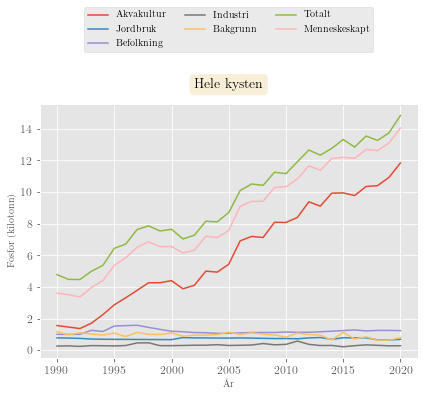

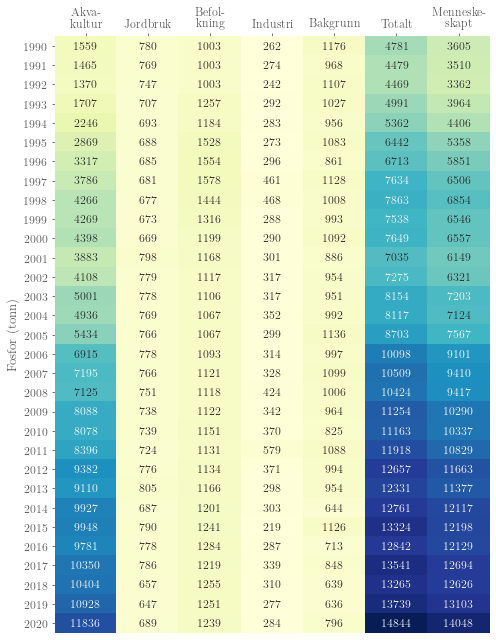

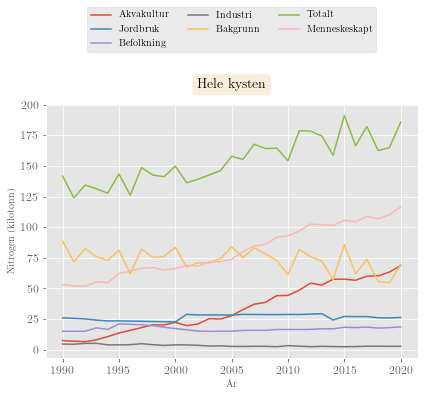

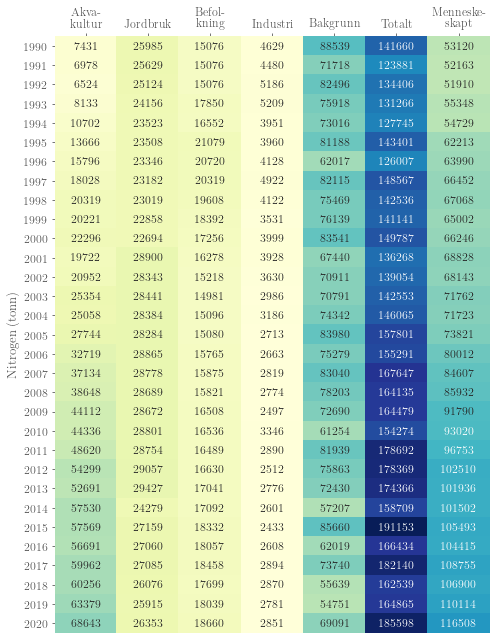

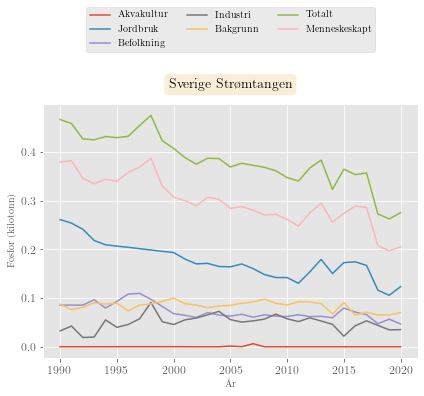

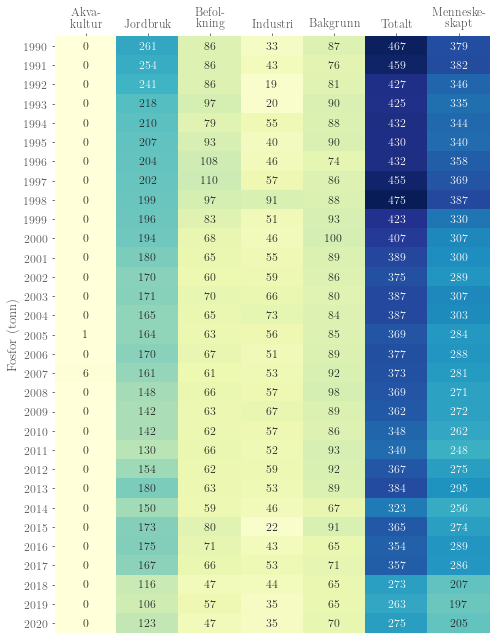

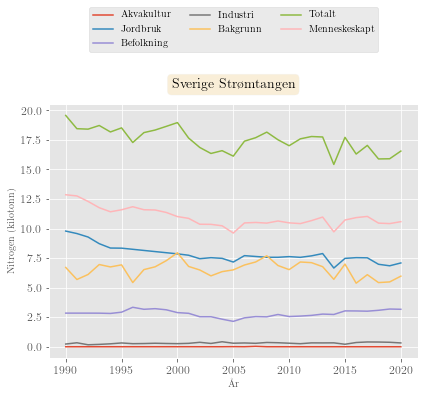

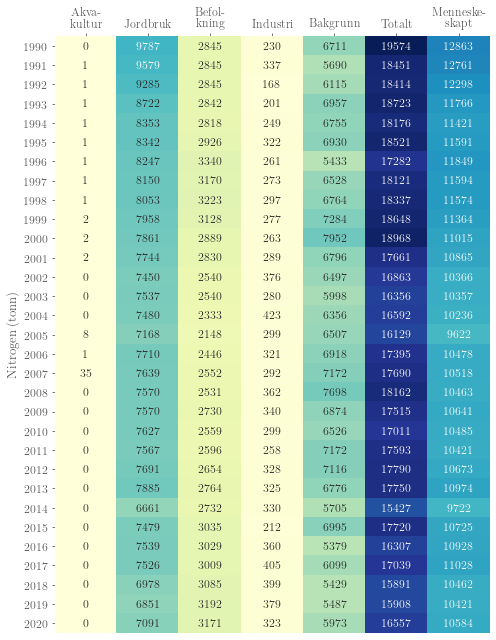

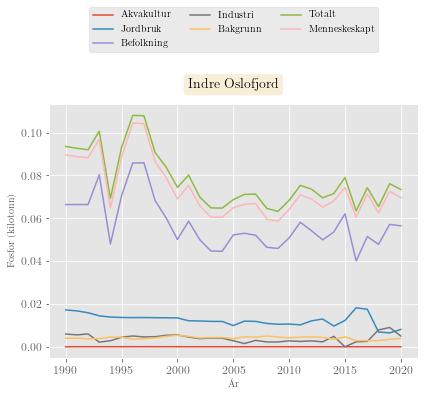

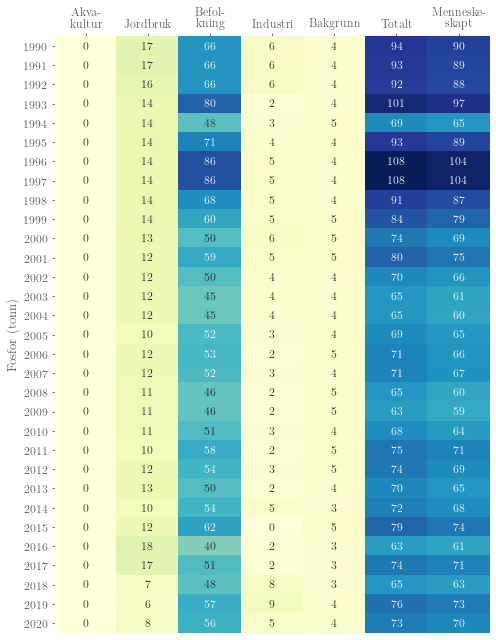

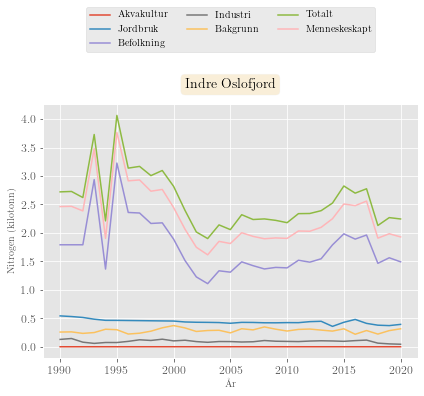

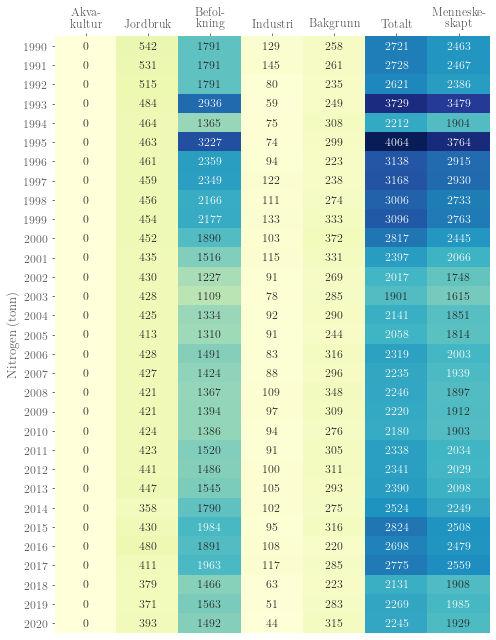

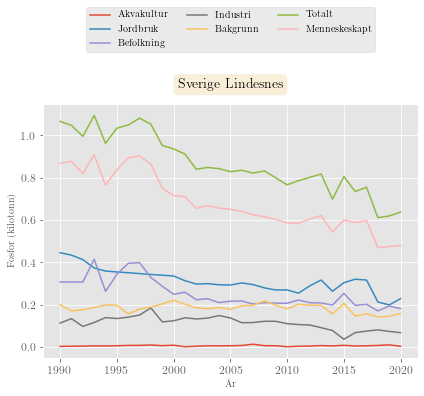

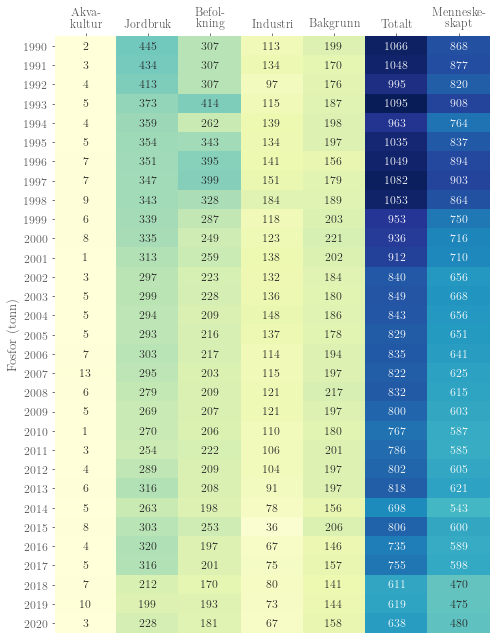

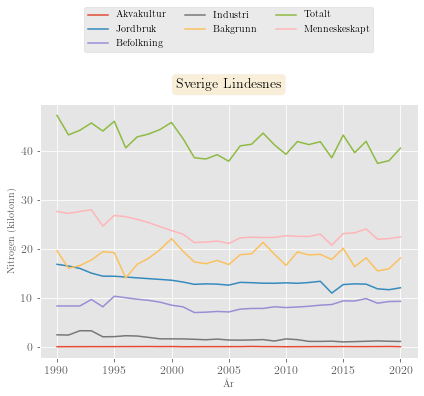

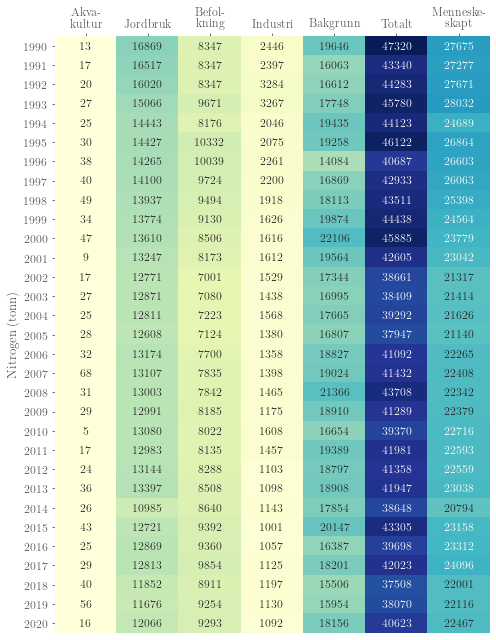

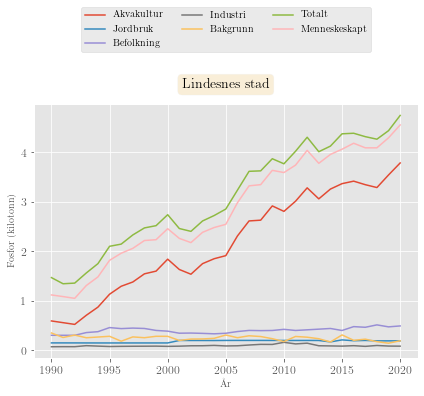

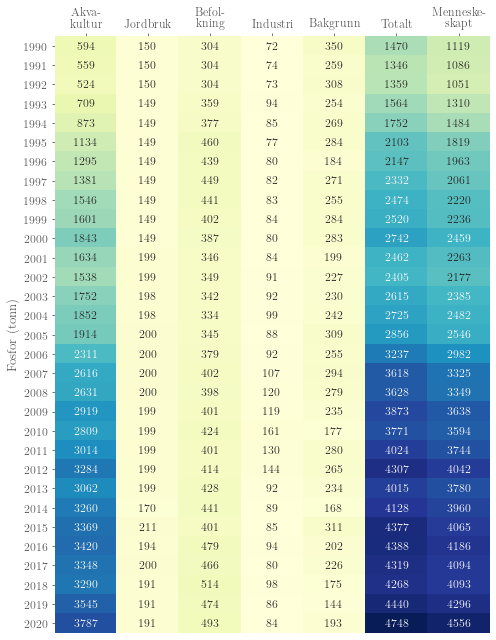

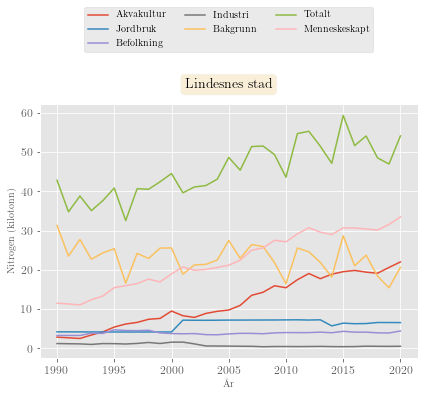

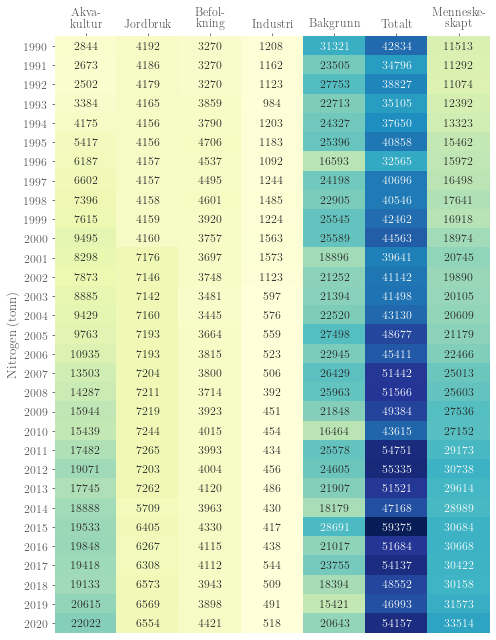

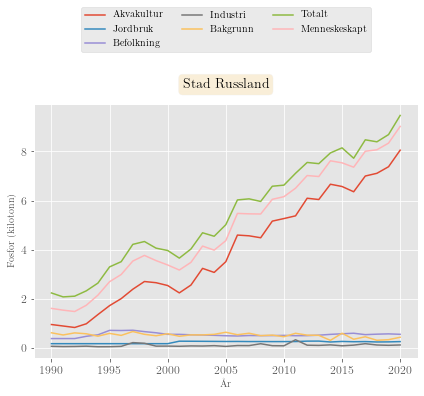

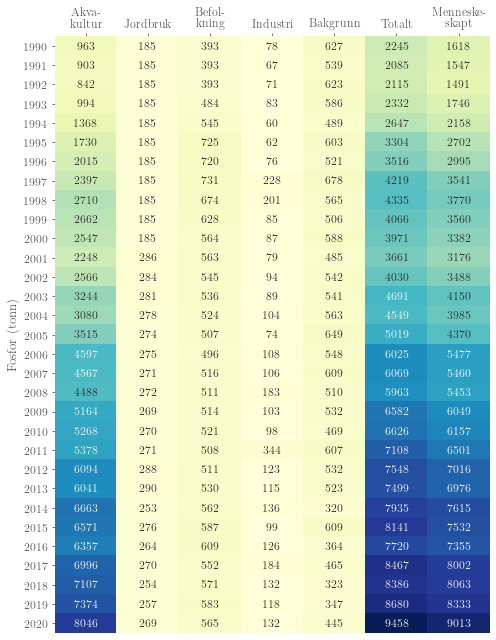

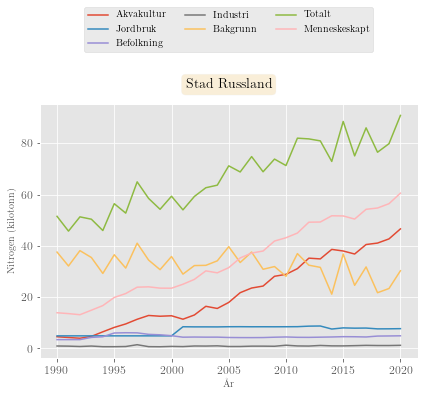

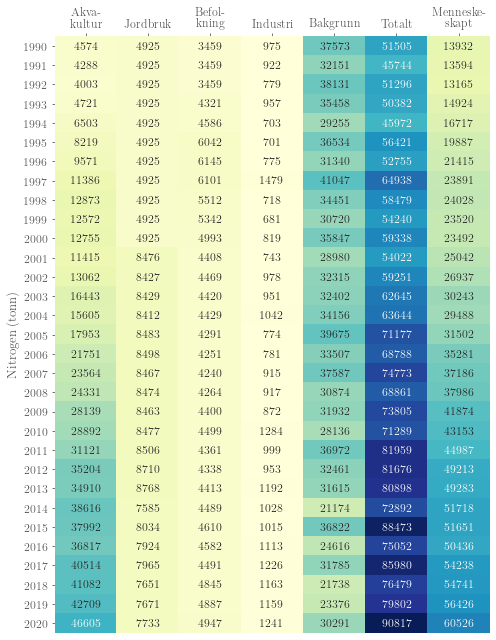

In [21]:
import matplotlib.pyplot as plt;
plt.style.use('ggplot')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

latex_map = {'Hele kysten' : '''\subsection{{Norges kystområder, {} (tonn)}}''',
             'Sverige Strømtangen' : '''\subsection{{Sverige--Strømtangen fyr, {} (tonn)}}''',
             'Indre Oslofjord' : '''\subsection{{Indre Oslofjord, {} (tonn)}}''',
             'Sverige Lindesnes' : '''\subsection{{Svenskegrensa--Lindesnes, {} (tonn)}}''',
             'Lindesnes stad' : '''\subsection{{Lindesnes--Stad, {} (tonn)}}''',
             'Stad Russland' : '''\subsection{{Stad--Russland, {} (tonn)}}''',
            }

insertFig = '''

\\begin{{figure}}[H]
\includegraphics{{./Figures/{}}}
\end{{figure}}

'''
#[trim=10 10 15 40]
# def myplot(df,figname,key):
#     lbl = 'Nitrogen'
#     if figname.split('_')[-1] == 'p':
#         lbl = 'Fosfor'
    
#     (df.rename(columns = {'Bakgrun':'Bakgrunn'})/1000).plot(figsize=(8,5))
#     ax=plt.gca()
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax.text(0.5, 1.08, key, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', horizontalalignment='center', bbox=props)
#     ax.set_ylabel('{} (kilotonn)'.format(lbl), fontsize='large', fontweight='bold')       
#     ax.set_xlabel('År', fontsize='large', fontweight='bold')
#     plt.legend(loc="upper center",fancybox=True,ncol=4,bbox_to_anchor=(0.5,1.4),fontsize='large')
#     plt.tick_params(axis='both', which='major', labelsize=12)
#     figpath = './Teotil/Latex//Figures/{}.png'.format(figname)
#     fig = plt.gcf()
#     fig.tight_layout()
#     plt.savefig(figpath)
def myplot(df,figname,key):
    lbl = 'Nitrogen'
    if figname.split('_')[-1] == 'p':
        lbl = 'Fosfor'
    
    (df.rename(columns = {'Bakgrun':'Bakgrunn'})/1000).plot(figsize=(6,6))
    ax=plt.gca()
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.5, 1.1, key, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='center', bbox=props)
    ax.set_ylabel('{} (kilotonn)'.format(lbl), fontsize='medium', fontweight='bold')       
    ax.set_xlabel('År', fontsize='medium', fontweight='bold')
    plt.legend(loc="upper center",fancybox=True,ncol=3,bbox_to_anchor=(0.5,1.4),fontsize='medium')
    plt.tick_params(axis='both', which='major', labelsize=12)
    figpath = './Teotil/Latex//Figures/{}.png'.format(figname)
    fig = plt.gcf()
    fig.tight_layout()
    plt.savefig(figpath,dpi=600)
    

with open('./Teotil/Latex/tables_2020.tex','w') as f :
    for key in ['Hele kysten', 'Sverige Strømtangen','Indre Oslofjord','Sverige Lindesnes','Lindesnes stad','Stad Russland']:
        basename = key.replace(' ','_')
        f.write(latex_map[key].format('fosfor'))
        myplot(tables_p[key], basename + '_p',key)
        f.write('''\\begin{table}\n\centering\n''')
        f.write(tables_p[key].to_latex(float_format="%.0f"))
        plotTable(tables_p[key],'Fosfor (tonn)', key.replace(' ','_') + '_p.png')
        f.write('\end{table}\n')
        f.write(insertFig.format(basename + '_p'))
#         f.write("\\FloatBarrier\n")
        
        f.write(latex_map[key].format('nitrogen'))
        myplot(tables_n[key], basename + '_n',key)
        f.write('''\\begin{table}\n\centering\n''')
        f.write(tables_n[key].to_latex(float_format="%.0f"))
        plotTable(tables_n[key],'Nitrogen (tonn)', key.replace(' ','_') + '_n.png')
        f.write('\end{table}\n')
        f.write(insertFig.format(basename + '_n'))
#         f.write("\\FloatBarrier\n")
        
#Modifying table in tex file
with Connection('localhost') as c:
    c.local('''sed -i 's/{}.*\\\\/ \& Akva- \&  Jord- \&  Befol- \&  Indus- \&  Bak- \&  Totalt \& Menneske-\\\\\\\\/g' ./Teotil/Latex/tables_2020.tex''')
    c.local('''sed -i 's/År.*\\\\/År \& kultur \& bruk\&kning \&tri \&grunn \& \& skapt \\\\\\\\/g' ./Teotil/Latex/tables_2020.tex''')
    c.local('''sed -i  's/\\\\begin{table}/\\\\begin{table}\[H\]/g' ./Teotil/Latex/tables_2020.tex ''')


/home/jose-luis/Envs/teotil/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


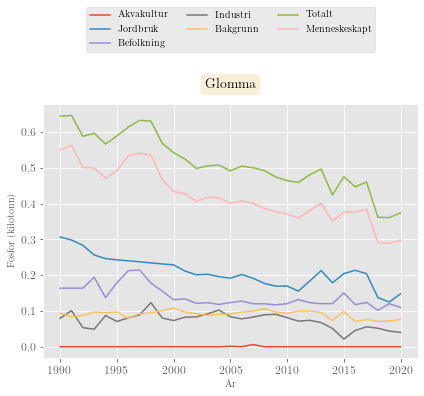

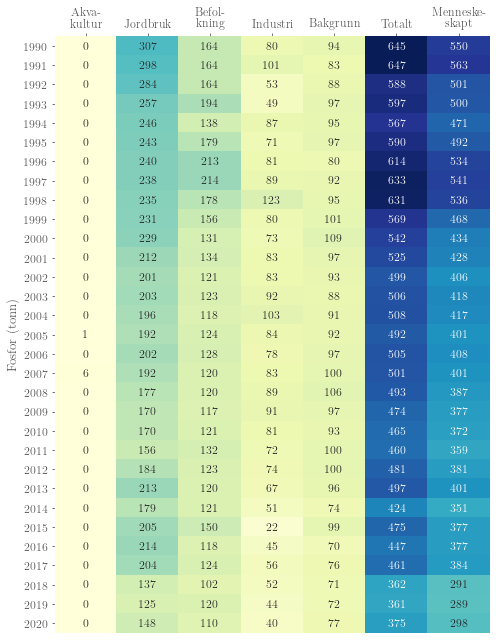

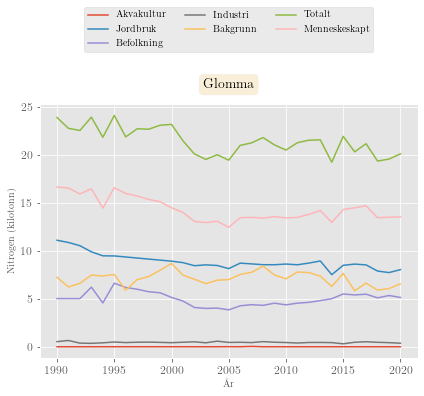

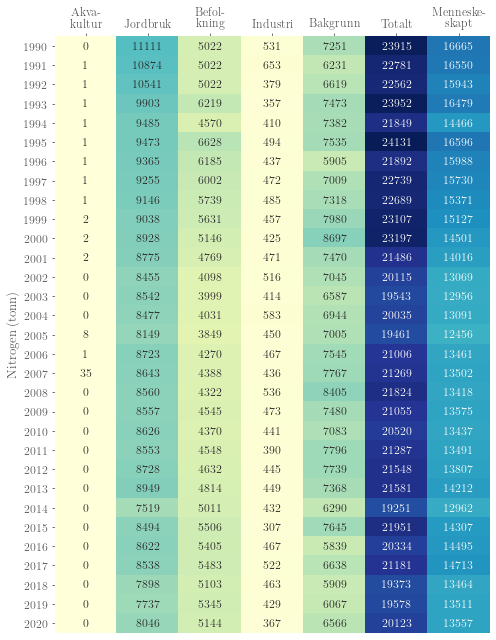

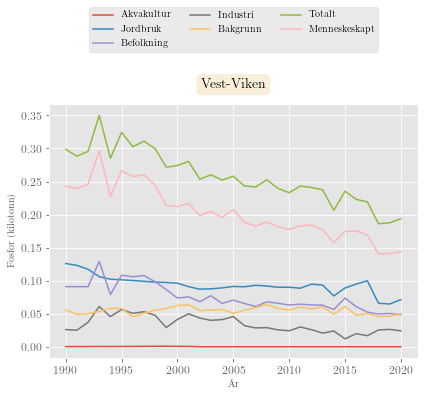

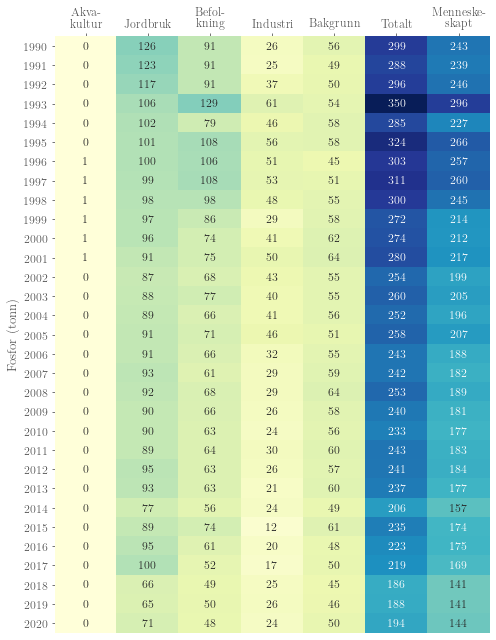

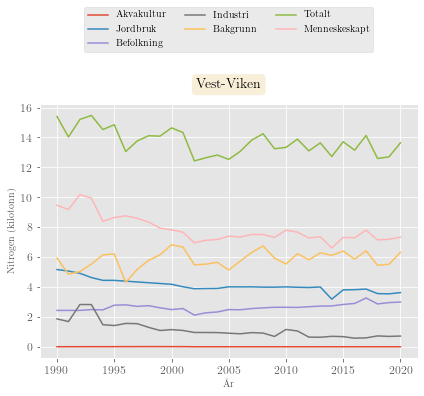

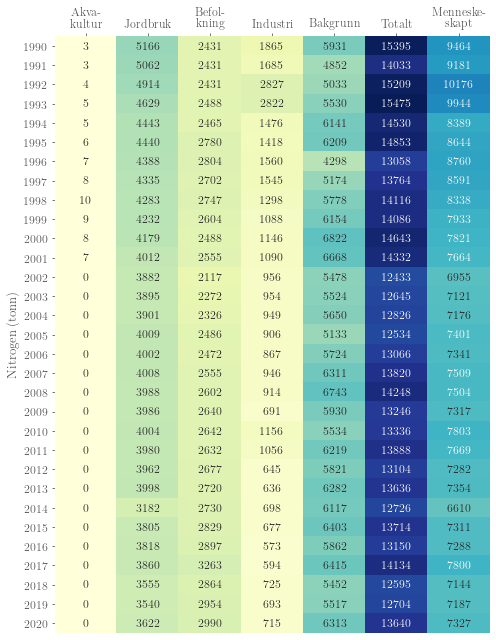

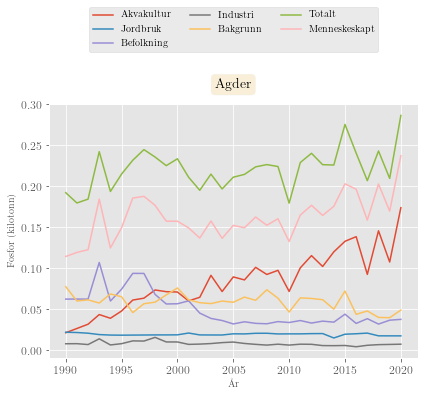

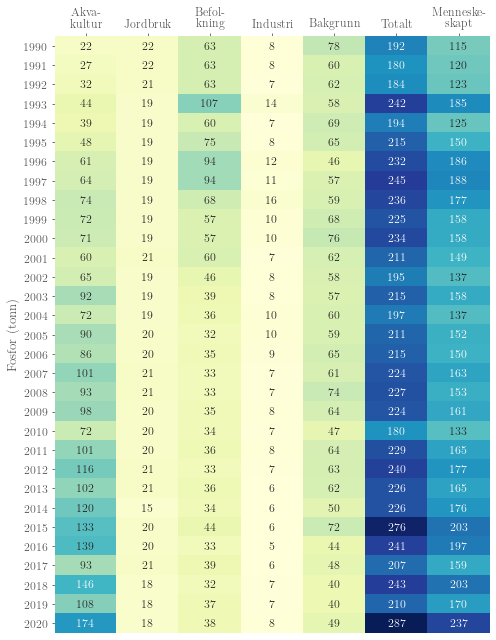

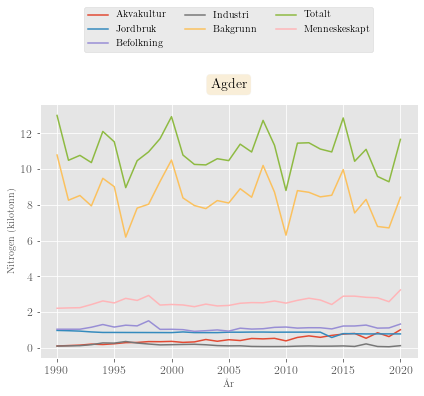

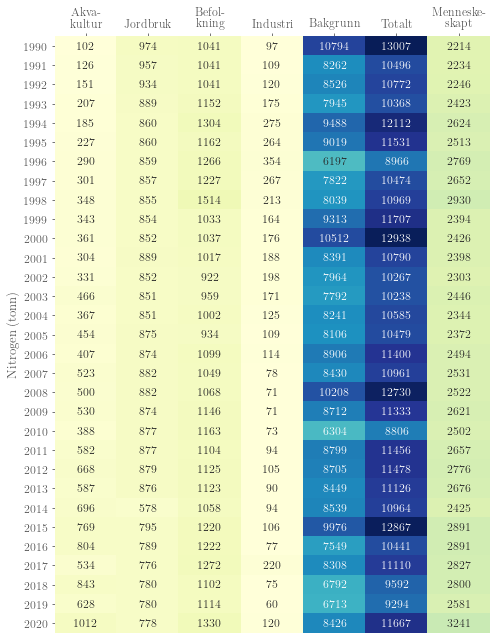

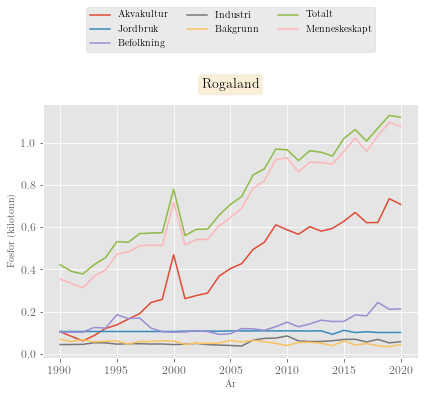

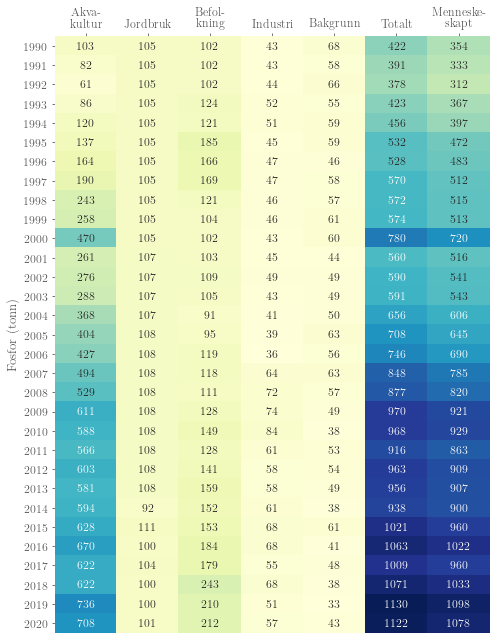

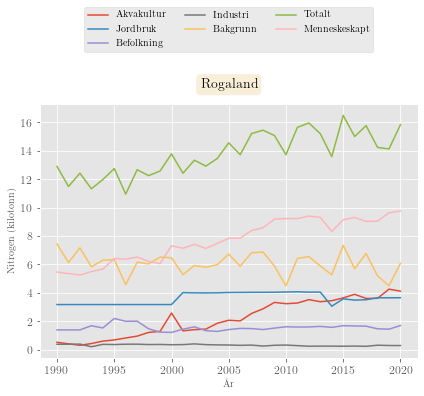

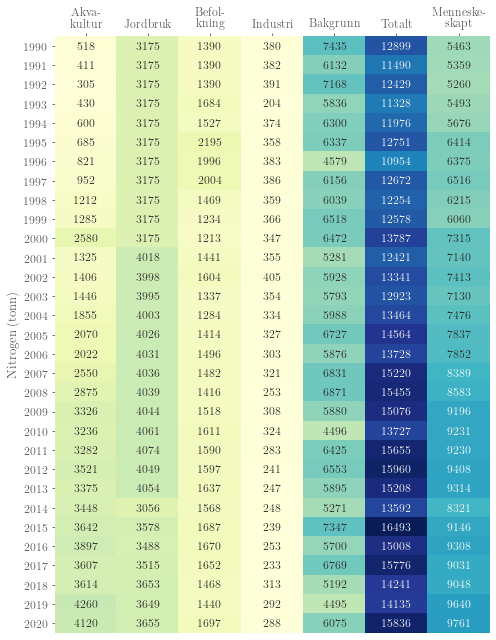

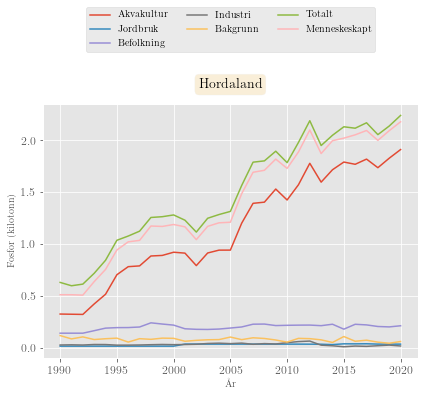

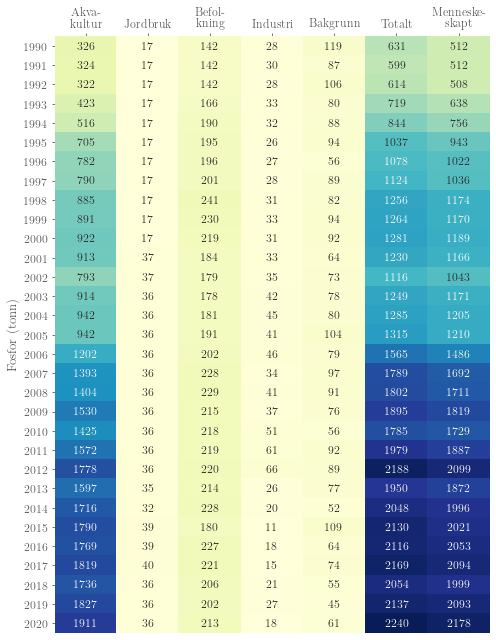

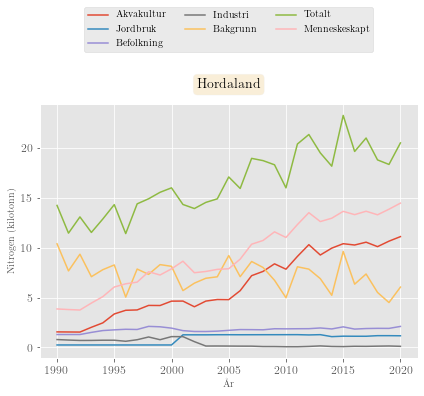

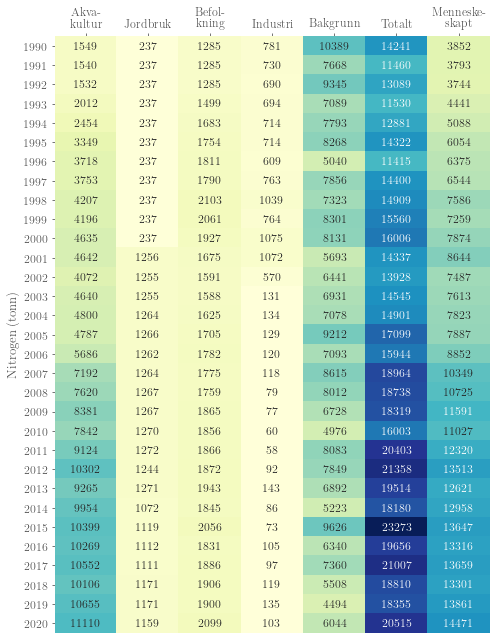

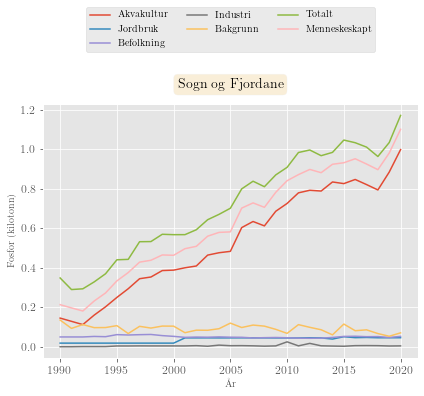

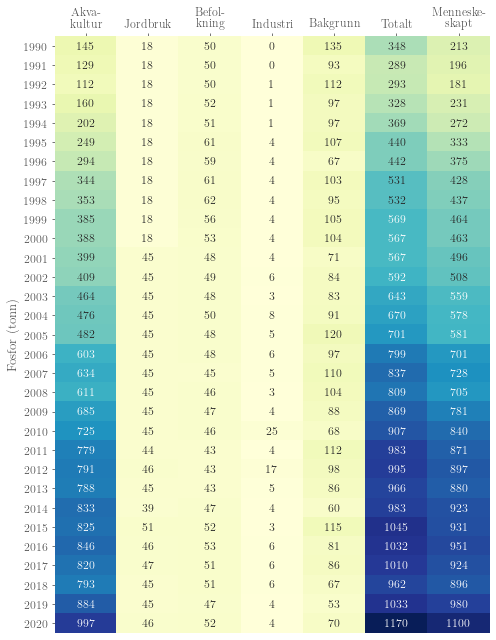

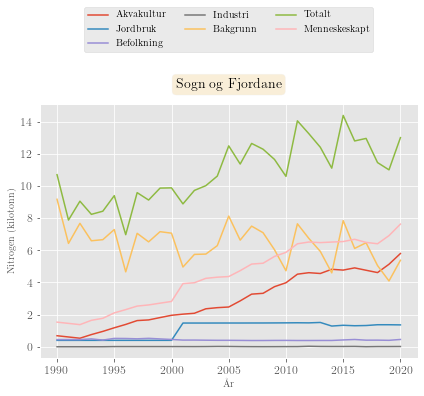

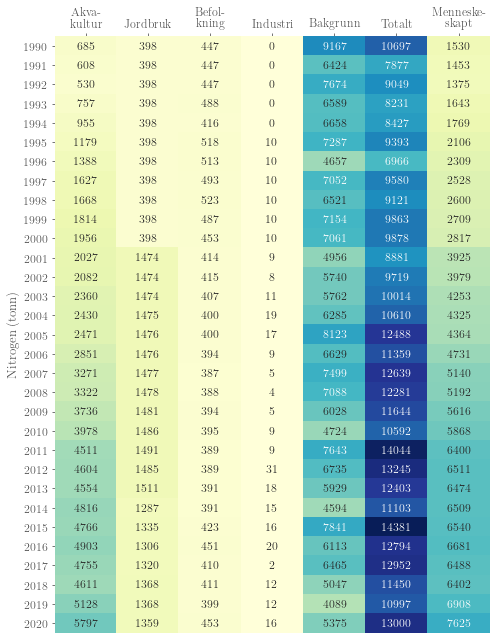

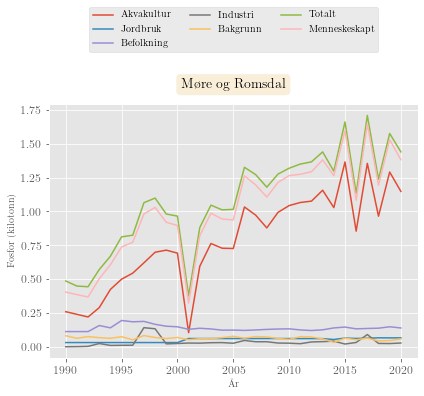

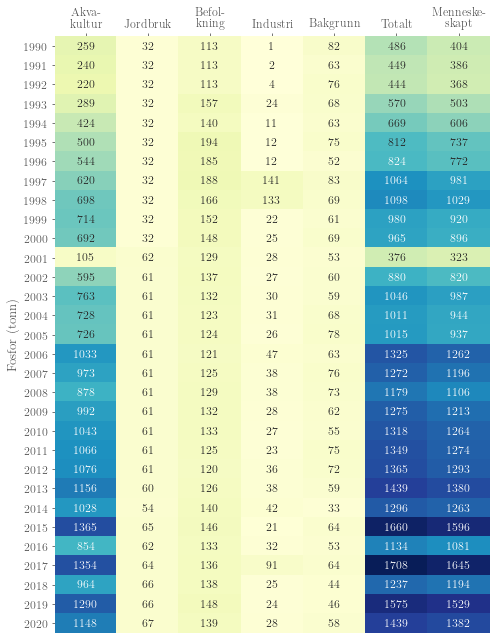

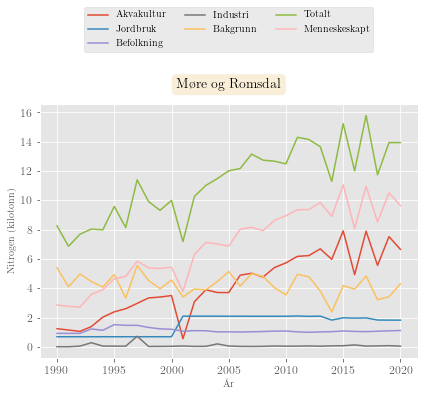

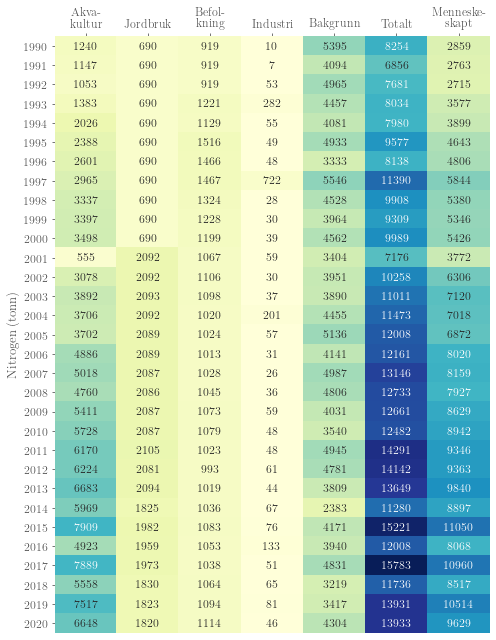

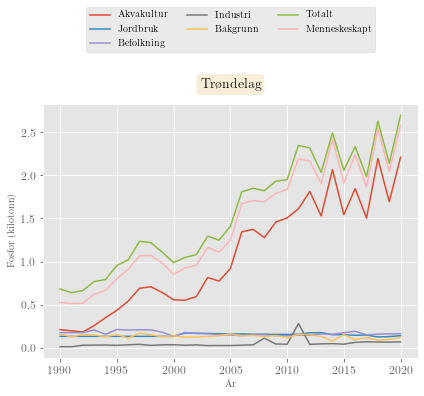

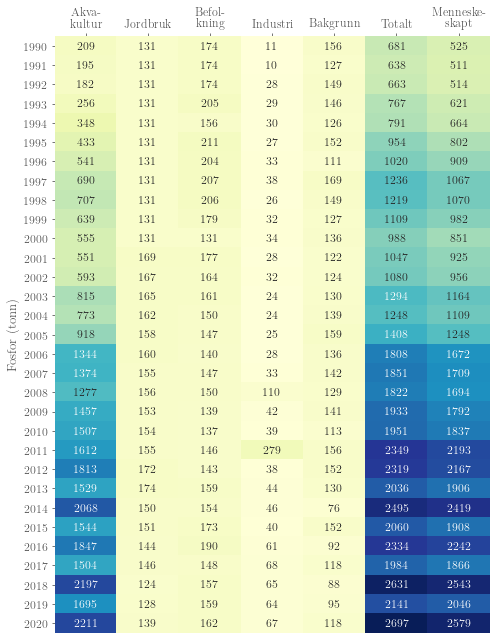

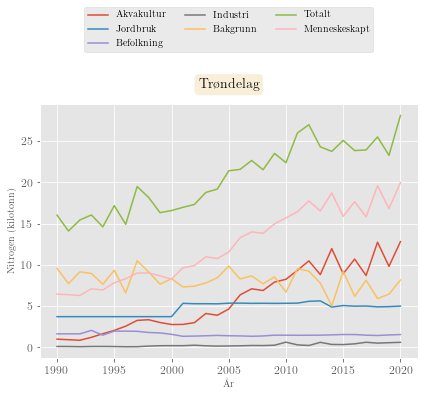

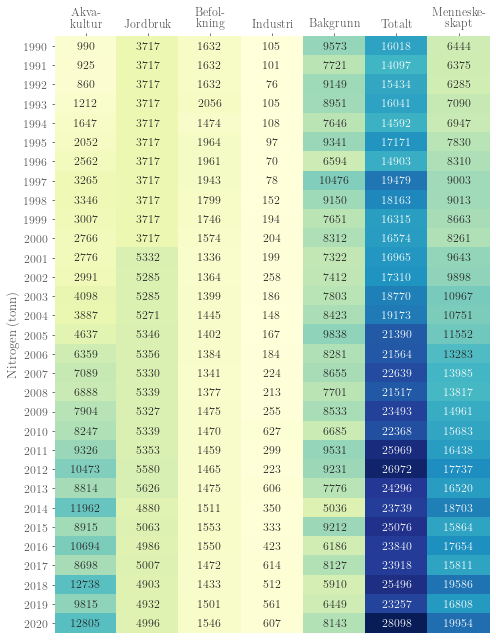

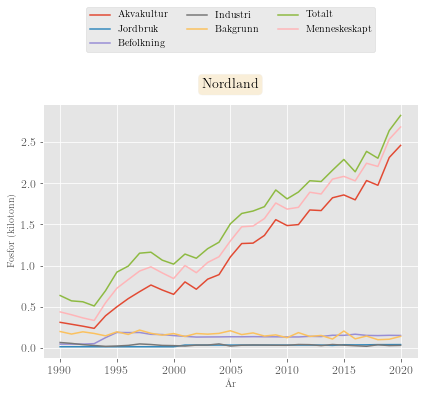

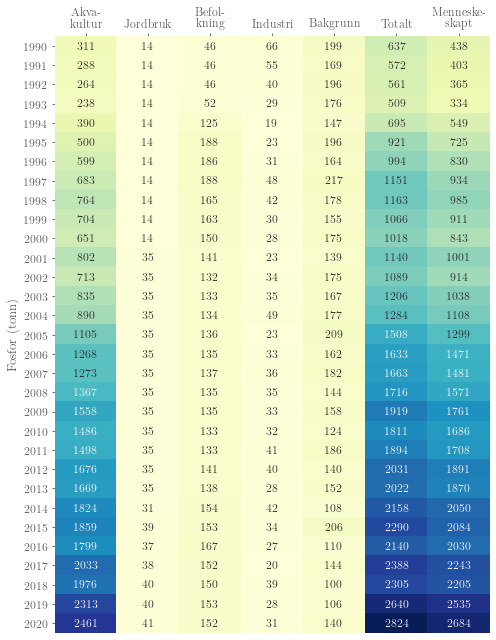

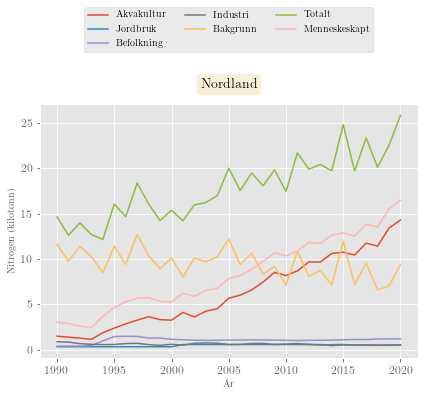

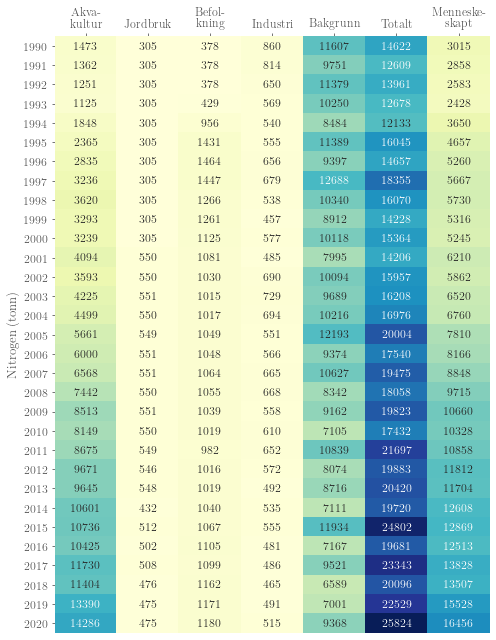

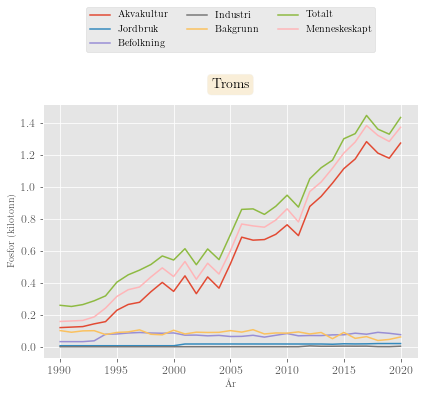

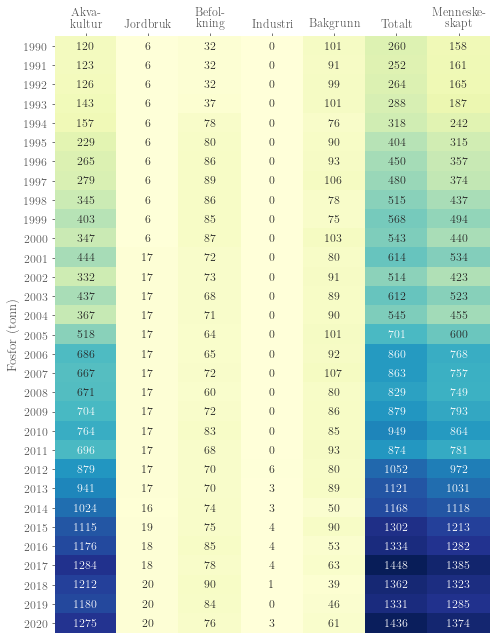

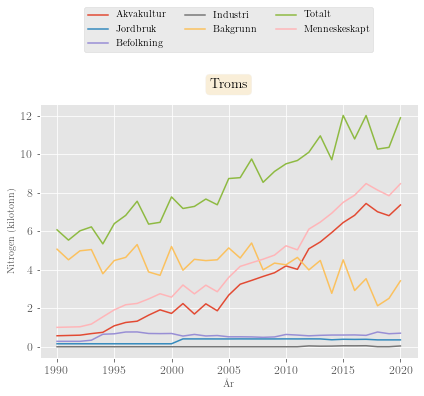

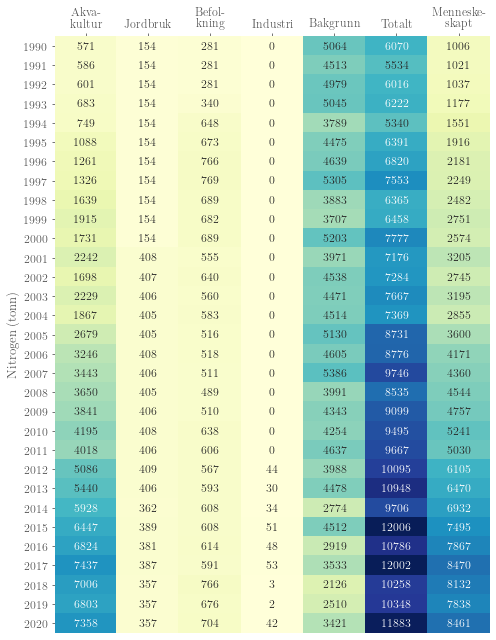

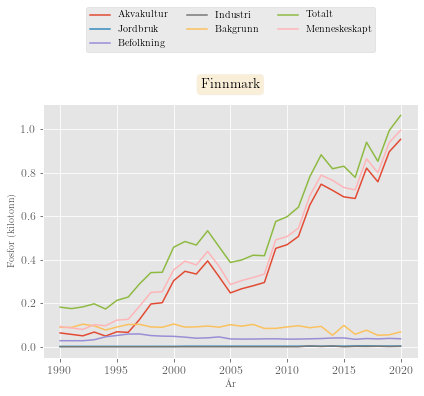

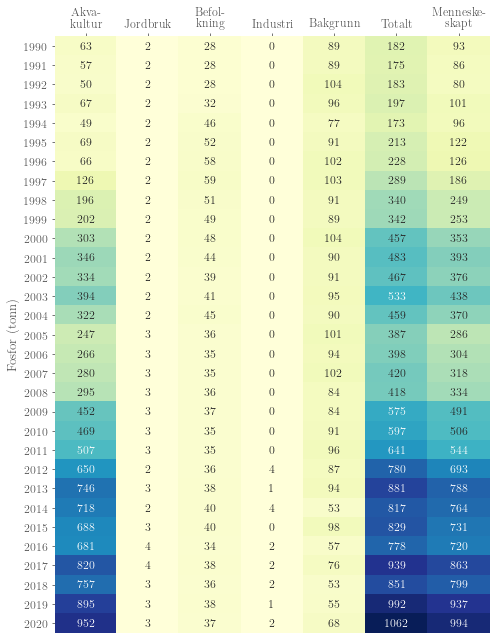

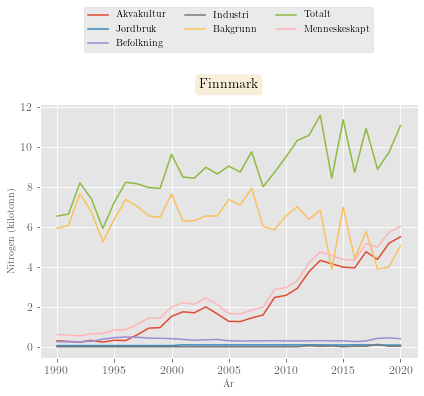

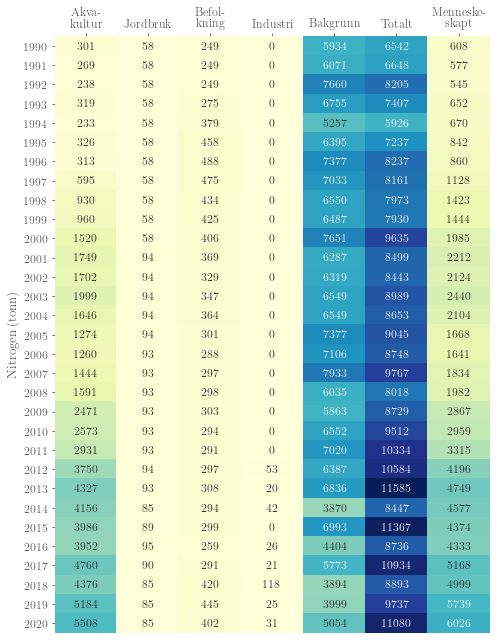

In [22]:
#Norskevannregioner
latex_map = {'''Glomma''': '''\subsection{{Vannregion Glomma, {} (tonn)}}''',
             'Vest-Viken' : '''\subsection{{Vannregion Vest-Viken, {} (tonn)}}''',
             'Agder' : '''\subsection{{Vannregion Agder, {} (tonn)}}''',
             'Rogaland' : '''\subsection{{Vannregion Rogaland, {} (tonn)}}''',
             'Hordaland' : '''\subsection{{Vannregion Hordaland, {} (tonn)}}''',
             'Sogn og Fjordane' : '''\subsection{{Vannregion Sogn og Fjordane, {} (tonn)}}''',
             'Møre og Romsdal' : '''\subsection{{Vannregion Møre og Romsdal, {} (tonn)}}''',
             'Trøndelag' : '''\subsection{{Vannregion Trøndelag, {} (tonn)}}''',
             'Nordland' : '''\subsection{{Vannregion Nordland, {} (tonn)}}''',
             'Troms' : '''\subsection{{Vannregion Troms, {} (tonn)}}''',
             'Finnmark' : '''\subsection{{Vannregion Finnmark, {} (tonn)}}''',
            }

with open('./Teotil/Latex/norskevannregioner_2020.tex','w') as f :
    for key in latex_map.keys():
        basename = key.replace(' ','_')
#         f.write('\\clearpage\n')
        f.write(latex_map[key].format('fosfor'))
        f.write('\n')
        myplot(tables_p[key], basename + '_p',key)
        f.write('''\\begin{table}\n\centering\n''')
        f.write(tables_p[key].to_latex(float_format="%.0f"))
        plotTable(tables_p[key],'Fosfor (tonn)', key.replace(' ','_') + '_p.png')
        f.write('''\end{table}\n''')
        f.write(insertFig.format(basename + '_p'))
#         f.write("\\FloatBarrier\n")
        
#         f.write('\\clearpage\n')
        f.write(latex_map[key].format('nitrogen'))
        f.write('\n')
        myplot(tables_n[key], basename + '_n',key)
        f.write('''\\begin{table}\n\centering\n''')
        f.write(tables_n[key].to_latex(float_format="%.0f"))
        plotTable(tables_n[key],'Nitrogen (tonn)', key.replace(' ','_') + '_n.png')
        f.write('''\end{table}\n''')
        f.write(insertFig.format(basename + '_n'))
        
#         f.write("\\FloatBarrier\n")
        
#Modifying table in tex file
with Connection('localhost') as c:
    c.local('''sed -i 's/{}.*\\\\/ \& Akva- \&  Jord- \&  Befol- \&  Indus- \&  Bak- \&  Totalt \& Menneske-\\\\\\\\/g' ./Teotil/Latex/norskevannregioner_2020.tex''')
    c.local('''sed -i 's/År.*\\\\/År \& kultur \& bruk\&kning \&tri \&grunn \& \& skapt \\\\\\\\/g' ./Teotil/Latex/norskevannregioner_2020.tex''')
    c.local('''sed -i  's/\\\\begin{table}/\\\\begin{table}\[H\]/g' ./Teotil/Latex/norskevannregioner_2020.tex ''')
insertMap = '''

\\begin{{figure}}[H]
\includegraphics{{/home/jose-luis/dummy/{}}}
\end{{figure}}

'''
    
with open('./Teotil/Latex/norskevannregioner_2020.tex','a') as f :
    f.write('\\clearpage\n')
    f.write('''\\subsection{Kartpresentasjon av tilførsler av næeringssalter till sjø fra vannregionene}''')
    f.write(insertMap.format('vannregion_fosfor'))
    f.write(insertMap.format('vannregion_nitrogen'))

In [23]:
#Inserting maps

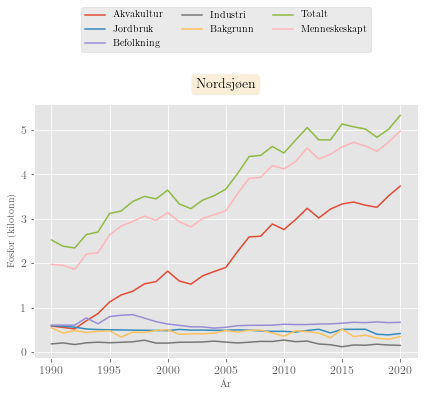

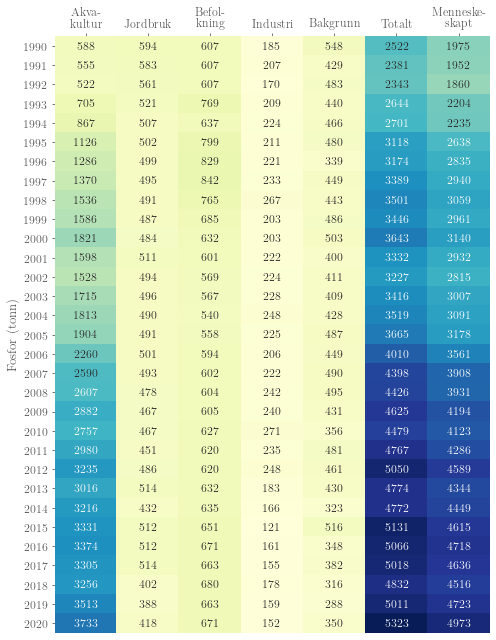

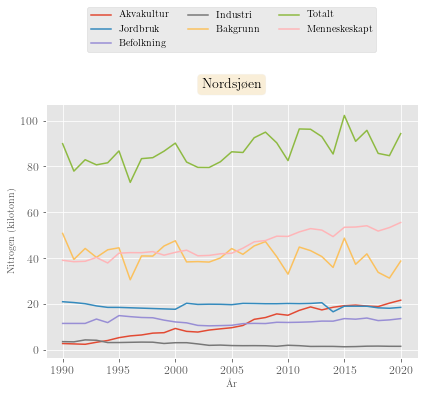

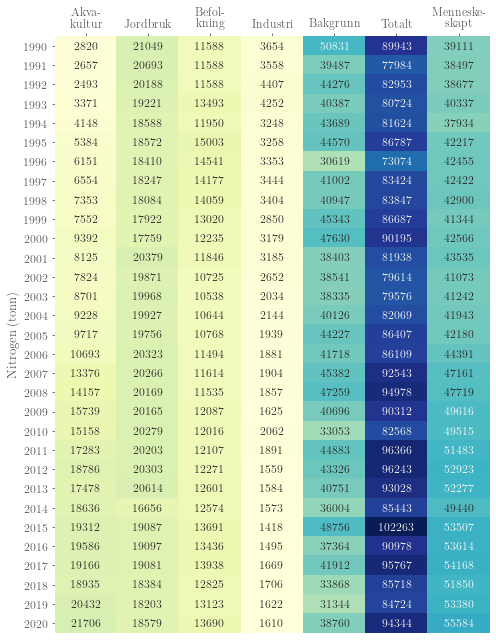

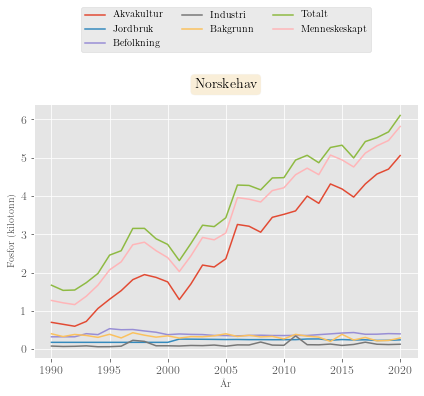

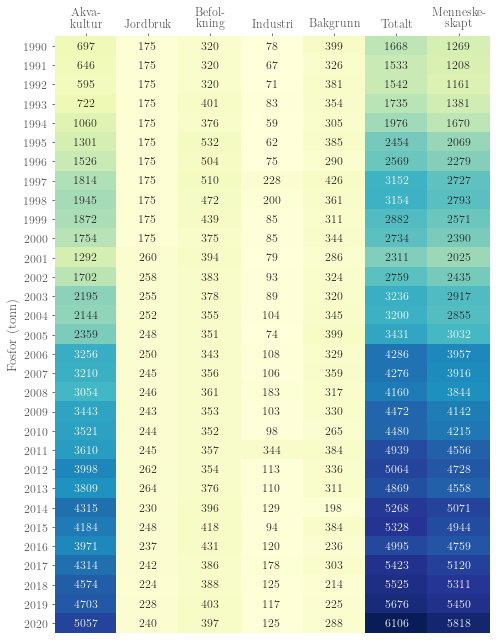

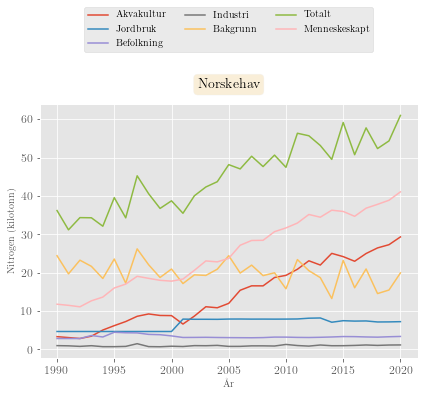

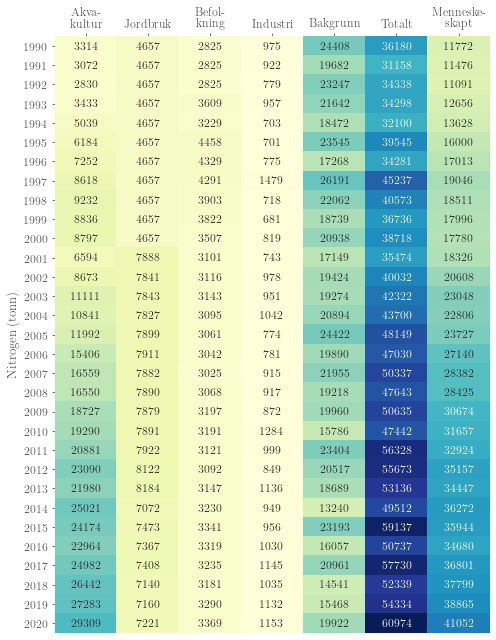

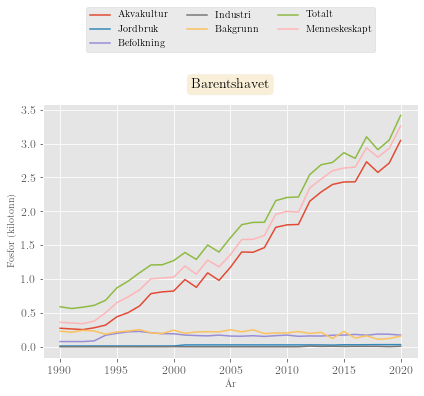

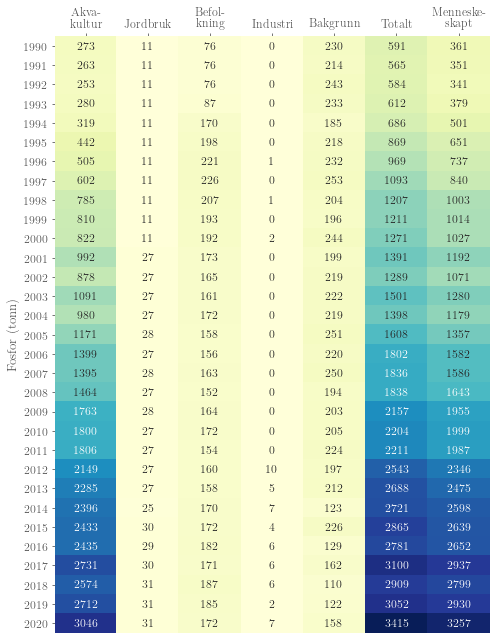

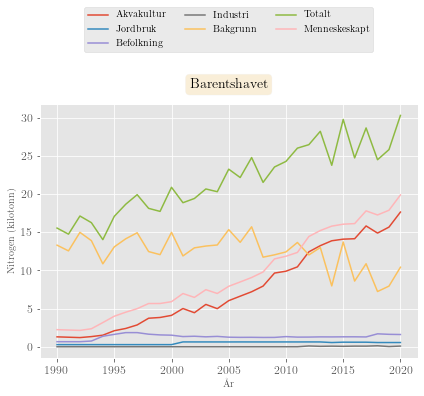

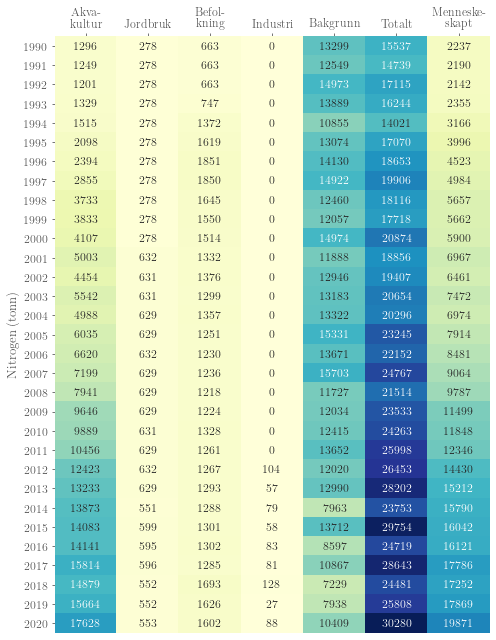

In [24]:
latex_map = {'''Nordsjøen''': '''\subsection{{Nordsjøen, {} (tonn)}}''',
             'Norskehav' : '''\subsection{{Norskehavet, {} (tonn)}}''',
             'Barentshavet' : '''\subsection{{Barentshavet, {} (tonn)}}'''
            }

with open('./Teotil/Latex/norskehav_2020.tex','w') as f :
    for key in latex_map.keys():
        basename = key.replace(' ','_')
#         f.write('\\clearpage\n')
        f.write(latex_map[key].format('fosfor'))
        myplot(tables_p[key], basename + '_p',key)
        f.write('''\\begin{table}\n\centering\n''')
        f.write(tables_p[key].to_latex(float_format="%.0f"))
        plotTable(tables_p[key],'Fosfor (tonn)', key.replace(' ','_') + '_p.png')
        f.write('\end{table}\n')
        f.write(insertFig.format(basename + '_p'))
#         f.write("\\FloatBarrier\n")
        
#         f.write('\\clearpage\n')
        f.write(latex_map[key].format('nitrogen'))
        myplot(tables_n[key], basename + '_n',key)
        f.write('''\\begin{table}\n\centering\n''')
        f.write(tables_n[key].to_latex(float_format="%.0f"))
        plotTable(tables_n[key],'Nitrogen (tonn)', key.replace(' ','_') + '_n.png')
        f.write('\end{table}\n')
        f.write(insertFig.format(basename + '_n'))
#         f.write("\\FloatBarrier\n")
        
#Modifying table in tex file
with Connection('localhost') as c:
    c.local('''sed -i 's/{}.*\\\\/ \& Akva- \&  Jord- \&  Befol- \&  Indus- \&  Bak- \&  Totalt \& Menneske-\\\\\\\\/g' ./Teotil/Latex/norskehav_2020.tex''')
    c.local('''sed -i 's/År.*\\\\/År \& kultur \& bruk\&kning \&tri \&grunn \& \& skapt \\\\\\\\/g' ./Teotil/Latex/norskehav_2020.tex''')
    c.local('''sed -i  's/\\\\begin{table}/\\\\begin{table}\[H\]/g' ./Teotil/Latex/norskehav_2020.tex ''')


with open('./Teotil/Latex/norskehav_2020.tex','a') as f :
#     f.write('\\clearpage\n')
    f.write('''\\subsection{Kartpresentasjon av tilførsler av næeringssalter forvaltingsplanområder}''')
    f.write(insertMap.format('vannregion_fosfor_hav'))
    f.write(insertMap.format('vannregion_nitrogen_hav'))


In [25]:
sql = '''drop table if exists access.conditions;
create table access.conditions (header varchar(50),minimum int, maximum int);
insert into access.conditions values
('Barentshavet',170,248),
('Nordsjøen',0,91),
('Norskehav',90,171),
('Hele kysten',0,248),
('Indre Oslofjord',4,10),
('Lindesnes stad',23,92),
('Stad Russland',91,248),
('Sverige Lindesnes',0,24),
('Sverige Strømtangen',0,3),
('Agder',17,27),
('Finnmark',210,248),
('Glomma',0,10),
('Hordaland',40,68),
('Møre og Romsdal',91,117),
('Nordland',143,186),
('Rogaland',26,41),
('Sogn og Fjordane',67,92),
('Troms',185,211),
('Trøndelag',116,144),
('Vest-Viken',10,18)

'''

In [26]:
#Adding this year's results to the vannregioner map in order to get the pie chart
sql = '''drop table if exists geo.vannregioner_2020;
create table geo.vannregioner_2020 as select * from geo.vannregioner;
select * from geo.vannregioner_2020;'''

display(query(sql,fetch=True))

gid           hav          ocean        vannregion vannreg_id  \
0     1  Barentshavet    Barents Sea          Finnmark     NO1105   
1     2   Norskehavet  Norwegian Sea             Troms     NO1104   
2     3   Norskehavet  Norwegian Sea          Nordland     NO1103   
3     4   Norskehavet  Norwegian Sea         Trøndelag     NO1102   
4     5   Norskehavet  Norwegian Sea   Møre og Romsdal     NO1101   
5     6       Nordsjø      North Sea  Sogn og Fjordane     NO5106   
6     7       Nordsjø      North Sea         Hordaland     NO5106   
7     8       Nordsjø      North Sea          Rogaland     NO5104   
8     9     Skagerrak      Skagerrak             Agder     NO5103   
9    10     Skagerrak      Skagerrak        Vest-Viken     NO5102   
10   11     Skagerrak      Skagerrak            Glomma     NO5101   

                                                 geom  
0   0106000020E9640000010000000103000000020000002D...  
1   0106000020E9640000010000000103000000010000003C...  
2   0106000020E9640000010000000103000000010000004C...  
3   0106000020E96400000100000001030000000100000036...  
4   0106000020E96400000100000001030000000100000068...  
5   0106000020E96400000100000001030000000100000094...  
6   0106000020E9640000010000000103000000010000005C...  
7   0106000020E96400000100000001030000000300000055...  
8   0106000020E96400000100000001030000000800000013...  
9   0106000020E964000001000000010300000002000000F1...  
10  0106000020E96400000100000001030000000200000042...

In [27]:
tables_n['Finnmark'].loc[2020,:].to_dict()

{'Akva-\nkultur': 5507.758299258052,
 'Jordbruk': 84.88310473432757,
 'Befol-\nkning': 402.2081253453108,
 'Industri': 31.266,
 'Bakgrunn': 5054.160990972334,
 'Totalt': 11080.276520310026,
 'Menneske-\nskapt': 6026.115529337689}

In [28]:
latex_map = {'''Glomma''': '''\subsection{{Vannregion Glomma, {} (tonn)}}''',
             'Vest-Viken' : '''\subsection{{Vannregion Vest-Viken, {} (tonn)}}''',
             'Agder' : '''\subsection{{Vannregion Agder, {} (tonn)}}''',
             'Rogaland' : '''\subsection{{Vannregion Rogaland, {} (tonn)}}''',
             'Hordaland' : '''\subsection{{Vannregion Hordaland, {} (tonn)}}''',
             'Sogn og Fjordane' : '''\subsection{{Vannregion Sogn og Fjordane, {} (tonn)}}''',
             'Møre og Romsdal' : '''\subsection{{Vannregion Møre og Romsdal, {} (tonn)}}''',
             'Trøndelag' : '''\subsection{{Vannregion Trøndelag, {} (tonn)}}''',
             'Nordland' : '''\subsection{{Vannregion Nordland, {} (tonn)}}''',
             'Troms' : '''\subsection{{Vannregion Troms, {} (tonn)}}''',
             'Finnmark' : '''\subsection{{Vannregion Finnmark, {} (tonn)}}''',
            }
lp = []
ln = []
for i in latex_map.keys():
    display(i)
    year_p = {'year' : 2020}
    year_n = {'year' : 2020}
    year_p['vannregion'] = i;
    year_p.update(tables_p[i].loc[2020,:].to_dict())
    year_n['vannregion'] = i;
    year_n.update(tables_n[i].loc[2020,:].to_dict())
    lp.append(year_p)
    ln.append(year_n)
    
pd.DataFrame(lp).set_index('year').to_csv('2020_p.csv')
pd.DataFrame(ln).set_index('year').to_csv('2020_n.csv')

sql ='''drop table if exists geo.n_2020;
drop table if exists geo.p_2020;

create table geo.n_2020 (
year           int,
vannregion     varchar(20),
Akvakultur     double precision,
Jordbruk       double precision,
Befolkning     double precision,
Industri       double precision,
Bakgrun        double precision,
Totalt         double precision,
Menneskeskapt  double precision
);

create table geo.p_2020 as select * from geo.n_2020;
'''

query(sql,fetch=False)


with Connection('localhost') as c:
    sql = '''\copy geo.n_2020(year,vannregion,Akvakultur,Jordbruk,Befolkning,Industri,Bakgrun,Totalt,Menneskeskapt) FROM '2020_n.csv' DELIMITER ',' CSV HEADER;'''
    f = NamedTemporaryFile(delete=False)
    f.write(bytes(sql,'utf-8'))
    f.seek(0)
    c.local('''psql -d teotil -f {}'''.format(f.name))
    f.close()
    
    
    sql = '''\copy geo.p_2020(year,vannregion,Akvakultur,Jordbruk,Befolkning,Industri,Bakgrun,Totalt,Menneskeskapt) FROM '2020_p.csv' DELIMITER ',' CSV HEADER;'''
    f = NamedTemporaryFile(delete=False)
    f.write(bytes(sql,'utf-8'))
    f.seek(0)
    c.local('''psql -d teotil -f {}'''.format(f.name))
    f.close()
    
    

'Glomma'

'Vest-Viken'

'Agder'

'Rogaland'

'Hordaland'

'Sogn og Fjordane'

'Møre og Romsdal'

'Trøndelag'

'Nordland'

'Troms'

'Finnmark'

COPY 11
COPY 11


In [29]:
lp = []
ln = []
for i in ['Barentshavet','Norskehav','Nordsjøen']:
    display(i)
    year_p = {'year' : 2020}
    year_n = {'year' : 2020}
    year_p['vannregion'] = i;
    year_p.update(tables_p[i].loc[2020,:].to_dict())
    year_n['vannregion'] = i;
    year_n.update(tables_n[i].loc[2020,:].to_dict())
    lp.append(year_p)
    ln.append(year_n)
    
pd.DataFrame(lp).set_index('year').to_csv('2020_p_hav.csv')
pd.DataFrame(ln).set_index('year').to_csv('2020_n_hav.csv')

sql ='''drop table if exists geo.n_2020_hav;
drop table if exists geo.p_2020_hav;

create table geo.n_2020_hav (
year           int,
vannregion     varchar(20),
Akvakultur     double precision,
Jordbruk       double precision,
Befolkning     double precision,
Industri       double precision,
Bakgrun        double precision,
Totalt         double precision,
Menneskeskapt  double precision
);

create table geo.p_2020_hav as select * from geo.n_2020_hav;
'''

query(sql,fetch=False)


with Connection('localhost') as c:
    sql = '''\copy geo.n_2020_hav(year,vannregion,Akvakultur,Jordbruk,Befolkning,Industri,Bakgrun,Totalt,Menneskeskapt) FROM '2020_n_hav.csv' DELIMITER ',' CSV HEADER;'''
    f = NamedTemporaryFile(delete=False)
    f.write(bytes(sql,'utf-8'))
    f.seek(0)
    c.local('''psql -d teotil -f {}'''.format(f.name))
    f.close()
    
    
    sql = '''\copy geo.p_2020_hav(year,vannregion,Akvakultur,Jordbruk,Befolkning,Industri,Bakgrun,Totalt,Menneskeskapt) FROM '2020_p_hav.csv' DELIMITER ',' CSV HEADER;'''
    f = NamedTemporaryFile(delete=False)
    f.write(bytes(sql,'utf-8'))
    f.seek(0)
    c.local('''psql -d teotil -f {}'''.format(f.name))
    f.close()

'Barentshavet'

'Norskehav'

'Nordsjøen'

COPY 3
COPY 3
